In [1]:
# importing libraries
import pandas as pd                  # Preparing high-level data sets, etc.
import numpy as np                   # library for multi-dimensional array, matrix processing, etc.
import matplotlib.pyplot as plt      # Visualization Library
import seaborn as sns                # Visualization Library 
%matplotlib inline


### Objective of the Analysis Report
The main goal of this report is to give a clear and fair view of how candidates performed in the NEET UG 2024 exam across different regions and centers. By providing insights into the scores and distribution of candidates, the report aims to help people understand the performance trends and patterns in various states, cities, and centers. This can be useful for educators, policymakers, and students to get a better picture of the examination outcomes.

### Explanation of Columns in the DataFrame

#### dummy_srlno:
- This is a unique serial number assigned to each entry in the dataset. It serves as a way to identify each candidate's record uniquely and ensure the real information is distinguishable from public data. 

#### marks:
- These are the scores that candidates have obtained in the NEET UG 2024 examination.

#### state:
- This column indicates the state from which the candidate appeared for the exam. For instance, it tells whether the candidate took the exam from Maharashtra, Karnataka, Tamil Nadu, etc.

#### city:
- This shows the city where the examination center is located. So, it tells us if the candidate took the exam in cities like Mumbai, Bangalore, Chennai, etc.

#### center_name:
- This is the name of the specific examination center where the candidate sat for the exam.

#### center_number:
 - This is a unique identifier given to each examination center, much like a room number in a School. It helps in identifying the exact center where the candidate took the exam, ensuring there's no mix-up between different centers.



In [2]:
df = pd.read_csv("C:\\Users\\user\\Desktop\\NEET DATA_ Analysis\\NEET_2024_RESULTS.csv")
df.head()
# Reading of Data Set from .csv file.

,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [3]:
df.shape
# Shape of the DataFrame

(2333120, 6)

In [4]:
df.describe()
# Description of the the Data Set

,dummy_srlno,marks,center_number
count,2.333120e+06,2.333120e+06,2.333120e+06
mean,3.224024e+09,2.171572e+02,3.224023e+05
std,1.049597e+09,1.662403e+02,1.049597e+05
min,1.101010e+09,-1.800000e+02,1.101010e+05
25%,2.602020e+09,8.700000e+01,2.602020e+05
50%,3.111190e+09,1.630000e+02,3.111190e+05
75%,4.122060e+09,3.130000e+02,4.122060e+05
max,9.914010e+09,7.200000e+02,9.914010e+05


In [5]:
# General Information of the DataFrame/Data Sheet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2333120 entries, 0 to 2333119
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   dummy_srlno    int64 
 1   marks          int64 
 2   state          object
 3   city           object
 4   center_name    object
 5   center_number  int64 
dtypes: int64(3), object(3)
memory usage: 106.8+ MB


In [6]:
# Checking data types in the DataFrame/Data Sheet
df.dtypes

dummy_srlno       int64
marks             int64
state            object
city             object
center_name      object
center_number     int64
dtype: object

In [7]:
df.isnull().sum()
# No null values in the Data Set

dummy_srlno      0
marks            0
state            0
city             0
center_name      0
center_number    0
dtype: int64

In [8]:
# Checking Missing Values
df.isna().any()

dummy_srlno      False
marks            False
state            False
city             False
center_name      False
center_number    False
dtype: bool

In [62]:
df.duplicated().sum()

## Tell duplicate values in the DataFrame

0

In [9]:
# Create a deep copy of the DataFrame
DF_copy = df.copy(deep=True)

DF_copy.head()

,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [10]:
DF_copy.tail()

,dummy_srlno,marks,state,city,center_name,center_number
2333115,4613120135,279,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333116,4613120136,102,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333117,4613120137,14,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333118,4613120138,179,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312
2333119,4613120139,91,WEST BENGAL,KALYANI,CHAKDAHA MODEL SCHOOL,461312


In [11]:
DF_copy.drop(columns=["dummy_srlno"],inplace=True)

# Comment
## We are dropping the 'dummy_srlno' from the dataset because it contains approximately
### 2.3 million different values. Due to its high uniqueness, this column is likely not 
#### significant for our analysis.
DF_copy.head()

,marks,state,city,center_name,center_number
0,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [12]:
DF_copy.state.unique()
# Unique names in the column "state"

array(['ANDAMAN AND NICOBAR ISLANDS (UT)', 'ANDHRA PRADESH',
       'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR', 'CHANDIGARH(UT)',
       'CHHATTISGARH', 'DADRA AND NAGAR HAVELI (UT)',
       'DAMAN AND DIU (UT)', 'DELHI', 'GOA', 'GUJARAT', 'HARYANA',
       'HIMACHAL PRADESH', 'JAMMU AND KASHMIR', 'JHARKHAND', 'KARNATAKA',
       'KERALA', 'LADAKH(UT)', 'LAKSHADWEEP (UT)', 'MADHYA PRADESH',
       'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM', 'NAGALAND',
       'ODISHA', 'OUTSIDE-INDIA', 'PUDUCHERRY(UT)', 'PUNJAB', 'RAJASTHAN',
       'SIKKIM', 'TAMIL NADU', 'TELANGANA', 'TRIPURA', 'UTTAR PRADESH',
       'UTTARAKHAND', 'WEST BENGAL'], dtype=object)

In [13]:
DF_copy.state.unique().size
# Count of Unique names in the column "state"

38

In [15]:
DF_copy.center_name.unique()
# Unique names in the column "center_name"

array(['KENDRIYA VIDYALAYA NO. 1',
       'DR B R AMBEDKAR INSTITUTE OF TECHNOLOGY',
       'GOVERNMENT MODEL SENIOR SECONDARY SCHOOL', ...,
       'KATAGUNJ GOKULPUR ADARSHA SHIKSHAYATAN HIGH SCHOOL',
       'GARDEN HIGH SCHOOL', 'CHAKDAHA MODEL SCHOOL'], dtype=object)

In [16]:
DF_copy.center_name.unique().size
# Count of Unique names in the column "center_name"

4403

In [17]:
DF_copy.center_number.unique()
# Unique numbers in the column "center_number"

array([110101, 110102, 110103, ..., 461310, 461311, 461312], dtype=int64)

In [18]:
DF_copy.center_number.unique().size
# Count of Unique numbers in the column "center_number"

4750

In [1]:
state.size()
## Row count per state.

NameError: name 'state' is not defined

In [19]:
state = DF_copy.groupby("state")
##  --> another SYNTAX for above syntax 
### state = DF_copy.groupby(DF_copy.state)

In [20]:
state.describe()

###  SYNTAX -- state.marks.describe -- "IMPORTANT"
###  SYNTAX -- state.center_number.describe -- "Not Important as it is just a number"

marks                                 \
                                     count        mean         std    min   
state                                                                       
ANDAMAN AND NICOBAR ISLANDS (UT)    1025.0  192.737561  126.354313   -5.0   
ANDHRA PRADESH                     63842.0  260.972385  174.312416  -89.0   
ARUNACHAL PRADESH                   4774.0  162.896942  116.649557  -16.0   
ASSAM                              44272.0  190.940459  154.371341 -102.0   
BIHAR                             136191.0  188.583585  158.670862 -180.0   
CHANDIGARH(UT)                      3530.0  304.816714  178.131070    0.0   
CHHATTISGARH                       44241.0  185.636084  145.139822  -44.0   
DADRA AND NAGAR HAVELI (UT)         1207.0  221.932063  150.286273  -10.0   
DAMAN AND DIU (UT)                   769.0  180.239272  117.562217   -4.0   
DELHI                              66090.0  256.136435  168.662799  -36.0   
GOA                                 4930.0  196.671805  142.764237  -35.0   
GUJARAT                            86952.0  245.138410  165.274288 -149.0   
HARYANA                            54861.0  261.347332  177.713653  -96.0   
HIMACHAL PRADESH                   19062.0  225.689120  153.915124  -49.0   
JAMMU AND KASHMIR                  47551.0  205.416879  150.631378  -56.0   
JHARKHAND                          34401.0  207.921979  160.366419  -50.0   
KARNATAKA                         150894.0  219.466334  161.701130  -87.0   
KERALA                            138545.0  235.699838  168.399171 -136.0   
LADAKH(UT)                           715.0  166.485315  110.590677  -15.0   
LAKSHADWEEP (UT)                     167.0  150.119760  124.824252   -8.0   
MADHYA PRADESH                    130238.0  174.264999  145.390961  -53.0   
MAHARASHTRA                       275245.0  202.281102  163.061580 -170.0   
MANIPUR                             8946.0  200.175833  144.499414  -48.0   
MEGHALAYA                           3757.0  156.409369  110.038739  -15.0   
MIZORAM                             2569.0  155.139354   98.913179  -12.0   
NAGALAND                            3703.0  172.684040  107.367455  -19.0   
ODISHA                             64310.0  204.635624  167.633817  -65.0   
OUTSIDE-INDIA                       4750.0  250.775789  140.606571   -5.0   
PUDUCHERRY(UT)                      5810.0  196.230637  154.311836  -24.0   
PUNJAB                             26573.0  228.662364  164.777757 -144.0   
RAJASTHAN                         193129.0  280.355462  187.473278 -135.0   
SIKKIM                              1444.0  179.342798  121.522415 -103.0   
TAMIL NADU                        153702.0  220.351941  165.921398  -38.0   
TELANGANA                          77892.0  222.757729  154.615377 -126.0   
TRIPURA                             5098.0  178.175363  143.626350  -35.0   
UTTAR PRADESH                     332626.0  192.716892  158.915017  -67.0   
UTTARAKHAND                        21989.0  216.313793  158.798179  -55.0   
WEST BENGAL                       117320.0  219.479833  169.652150 -135.0   

                                                              center_number  \
                                    25%    50%     75%    max         count   
state                                                                         
ANDAMAN AND NICOBAR ISLANDS (UT)  103.0  155.0  263.00  680.0        1025.0   
ANDHRA PRADESH                    110.0  224.0  393.00  720.0       63842.0   
ARUNACHAL PRADESH                  79.0  129.0  218.00  705.0        4774.0   
ASSAM                              76.0  137.0  268.00  715.0       44272.0   
BIHAR                              71.0  133.0  263.00  720.0      136191.0   
CHANDIGARH(UT)                    155.0  270.0  437.00  715.0        3530.0   
CHHATTISGARH                       75.0  137.0  265.00  711.0       44241.0   
DADRA AND NAGAR HAVELI (UT)       105.0  183.0  312.50  692.0        1207.0   
DAMAN AND 

In [21]:
state.size()
## Row count per state.

state
ANDAMAN AND NICOBAR ISLANDS (UT)      1025
ANDHRA PRADESH                       63842
ARUNACHAL PRADESH                     4774
ASSAM                                44272
BIHAR                               136191
CHANDIGARH(UT)                        3530
CHHATTISGARH                         44241
DADRA AND NAGAR HAVELI (UT)           1207
DAMAN AND DIU (UT)                     769
DELHI                                66090
GOA                                   4930
GUJARAT                              86952
HARYANA                              54861
HIMACHAL PRADESH                     19062
JAMMU AND KASHMIR                    47551
JHARKHAND                            34401
KARNATAKA                           150894
KERALA                              138545
LADAKH(UT)                             715
LAKSHADWEEP (UT)                       167
MADHYA PRADESH                      130238
MAHARASHTRA                         275245
MANIPUR                               8946
MEGHA

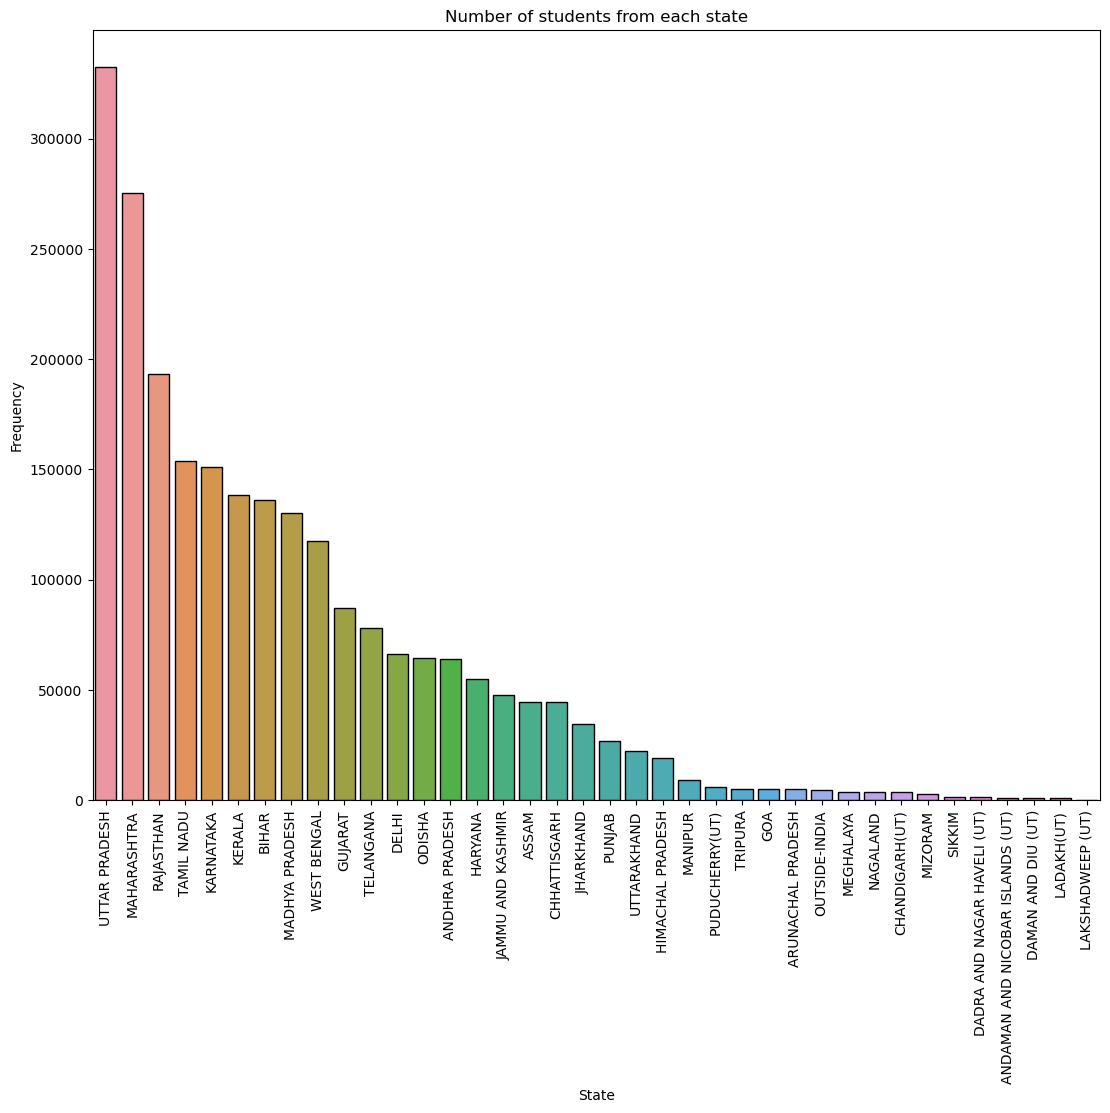

In [49]:
# Calculate frequency of each state
state_counts = DF_copy['state'].value_counts()

# Create the figure with specified size
plt.figure(figsize=(13, 10))  # Adjust width and height as needed

# Create the bar graph
## plt.bar(state_counts.index, state_counts.values)

# Create the bar plot using Seaborn
sns.barplot(x=state_counts.index, y=state_counts.values, edgecolor = 'black', linewidth = 1)
## sns.barplot(x=state_counts.index, y=state_counts.values, edgecolor = 'black', 
##    palette='viridis', linewidth = 1)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Number of students from each state')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=90)

# Show the plot
plt.show()

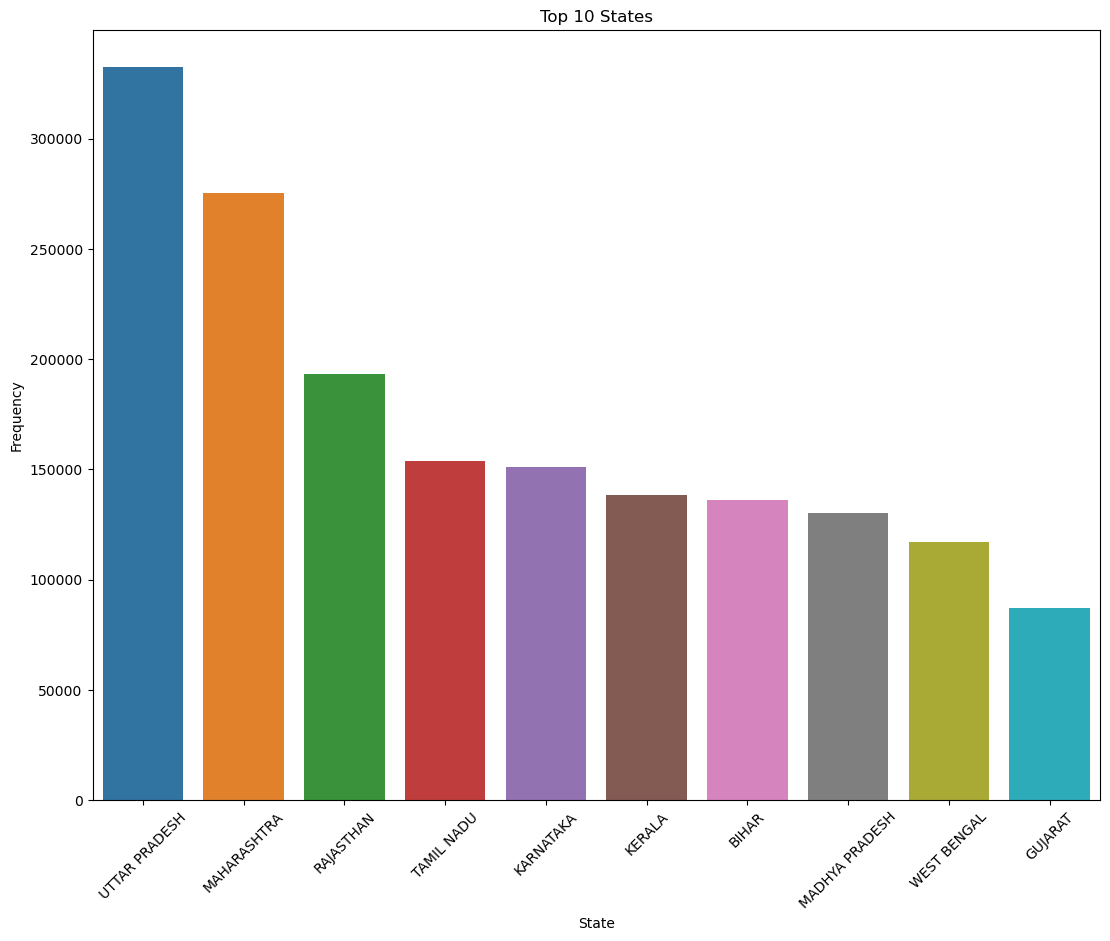

In [50]:
# Calculate frequency of each state
state_counts = DF_copy['state'].value_counts()

# Create the figure with specified size
plt.figure(figsize=(13, 10))  # Adjust width and height as needed

# Select top 10 states
top_10_states = state_counts.head(10)

# Create the bar plot using Seaborn
sns.barplot(x=top_10_states.index, y=top_10_states.values)

# Add labels and title
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Top 10 States')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.show()


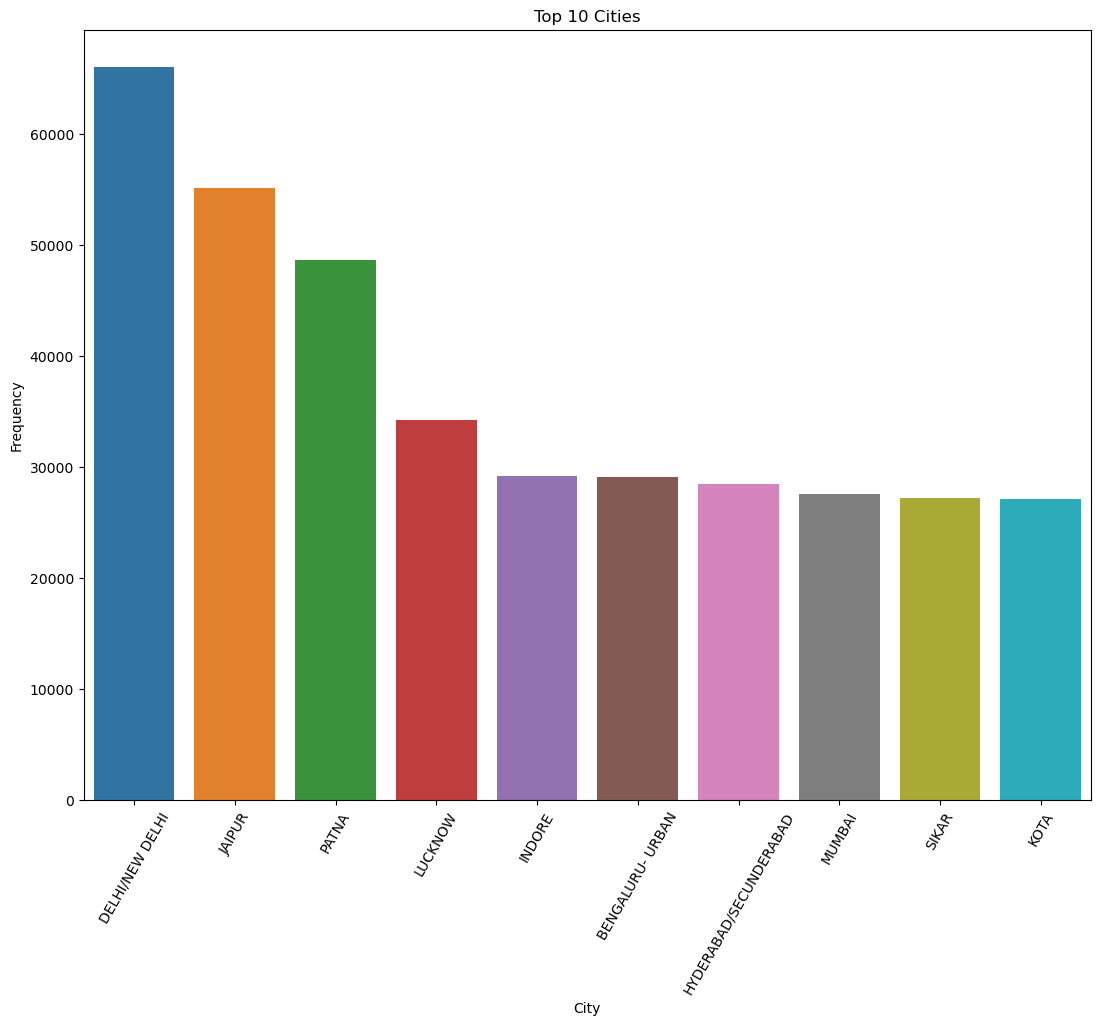

In [51]:
# Calculate frequency of each city
city_counts = DF_copy['city'].value_counts()

# Create the figure with specified size
plt.figure(figsize=(13, 10))  # Adjust width and height as needed

# Select top 10 cities
top_10_cities = city_counts.head(10)

# Create the bar plot using Seaborn
sns.barplot(x=top_10_cities.index, y=top_10_cities.values)

# Add labels and title
plt.xlabel('City')
plt.ylabel('Frequency')
plt.title('Top 10 Cities')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=60)

# Show the plot
plt.show()

In [65]:
DF_copy.city.unique()

array(['PORT BLAIR', 'GUNTUR', 'KURNOOL', 'NELLORE', 'TIRUPATHI',
       'VIJAYAWADA', 'PRODDATUR', 'RAJAHMUNDRY', 'SRIKAKULAM',
       'TADEPALLIGUDEM', 'TANUKU', 'VIZIANAGARAM', 'VISAKHAPATNAM',
       'TENALI', 'NARASARAOPET', 'MACHILIPATNAM', 'MANGALAGIRI',
       'ANANTAPUR', 'BHIMAVARAM', 'CHIRALA', 'CHITTOOR', 'ELURU', 'GOOTY',
       'GUDUR', 'KADAPA', 'KAKINADA', 'NANDYAL', 'ONGOLE',
       'ITANAGAR/NAHARLAGUN', 'NAMSAI', 'PASIGHAT', 'DIBRUGARH',
       'GUWAHATI', 'NAGAON', 'NALBARI', 'SIVASAGAR', 'UDALGURI',
       'SILCHAR', 'TEZPUR', 'BAKSA', 'BARPETA', 'DARRANG (MANGALDOI)',
       'DHUBRI', 'GOALPARA', 'GOLAGHAT', 'HAILAKANDI', 'JORHAT',
       'LAKHIMPUR', 'PATNA', 'HAJIPUR', 'MADHUBANI', 'NALANDA',
       'SITAMARHI', 'VAISHALI', 'ARARIA', 'ARRAH', 'ARWAL',
       'AURANGABAD (BR)', 'BANKA', 'BEGUSARAI', 'BETTIAH', 'BHABUA',
       'BHAGALPUR', 'MUZAFFARPUR', 'NAWADA', 'PURNEA', 'SAMASTIPUR',
       'SASARAM', 'SHEIKHPURA', 'SIWAN', 'SUPAUL', 'GAYA', 'BUXAR',
       '

In [64]:
DF_copy.city.unique().size
# Count of Unique names in the column "city"

567

<font size = 5.5> **City wise Analysis**

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [70]:
avg_all_INDIA = np.average(DF_copy['marks'])
var_all_INDIA = np.var(DF_copy['marks'])

top_2L = sorted(DF_copy['marks'], reverse=True)[0:200000]

avg_2L = np.average(top_2L)
var_2L = np.var(top_2L)

In [78]:
def AnalyzeCITY(city):
    city_df = DF_copy[DF_copy['city'] == city]
    
    # Average
    avg = np.average(city_df['marks'])
    var = np.var(city_df['marks'])
    print('Average Marks in City {} is {}'.format(city, round(avg, 2)))
    
    # Maximum
    maxi = max(city_df['marks'])
    print('Maximum Marks in City {} is {}'.format(city, maxi))
    
    # Minimum
    mini = min(city_df['marks'])
    print('Minimum Marks in City {} is {}'.format(city, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} City'.format(city))
    
    mu = avg_all_INDIA
    sigma = math.sqrt(var_all_INDIA)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of INDIA')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of students of city: {}'.format(city))
    plt.show()


Average Marks in City DELHI/NEW DELHI is 256.14
Maximum Marks in City DELHI/NEW DELHI is 720
Minimum Marks in City DELHI/NEW DELHI is -36


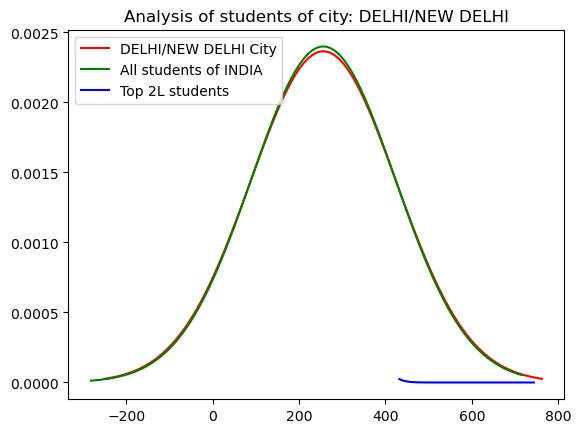

In [79]:
AnalyzeCITY("DELHI/NEW DELHI")

In [90]:
DF_copy[(DF_copy["marks"] == 720) & (DF_copy["city"])].sample(10)

,marks,state,city,center_name,center_number
1618395,720,RAJASTHAN,SIKAR,YASH PUBLIC SR. SEC. SCHOOL,392346
21178,720,ANDHRA PRADESH,VIJAYAWADA,DHANEKULA INSTITUTE OF ENGINEERING & TECHNOLOGY,120504
210943,720,BIHAR,PATNA,PM SHRI KENDRIYA VIDYALAYA,150245
2152641,720,UTTAR PRADESH,LUCKNOW,S.D.S.N. MAHAVIDYALAYA,440801
1427298,720,PUNJAB,SAHIBZADA AJIT SINGH NAGAR,VIVEK HIGH SCHOOL SECTOR 38-B CHANDIGARH,381404
1275135,720,MAHARASHTRA,MUMBAI,LAKSHDHAM HIGH SCHOOL,311007
1672180,720,TAMIL NADU,CHENNAI,SRI BALA VIDYALAYA PERAMBUR CHENNAI TAMIL NADU,410117
1617593,720,RAJASTHAN,SIKAR,SARASWATI PUBLIC SCHOOL,392344
1621853,720,RAJASTHAN,SRIGANGANAGAR,SHRI AATM VALLABH JAIN GIRLS P.G. COLLEGE,392502
126179,720,BIHAR,MADHUBANI,POLE STAR,150402


In [100]:
# Filter for students with perfect scores (720 Marks) and get the city values
perfect_score_cities = DF_copy[DF_copy["marks"] == 720]["city"].tolist()

# Print the list of cities
print(perfect_score_cities)

['NELLORE', 'VIJAYAWADA', 'VIJAYAWADA', 'VIJAYAWADA', 'MADHUBANI', 'SAMASTIPUR', 'PATNA', 'DARBHANGA', 'DELHI/NEW DELHI', 'AHMEDABAD', 'AHMEDABAD', 'RAJKOT', 'SURAT', 'RANCHI', 'BENGALURU- URBAN', 'BENGALURU- URBAN', 'MANGALURU (MANGALORE)', 'KOLLAM', 'KOTTAYAM', 'ANGAMALY', 'KOZHIKODE/CALICUT', 'AKOLA', 'NANDED', 'NAVI MUMBAI', 'NAGPUR', 'MUMBAI', 'MUMBAI', 'NAGPUR', 'BHATINDA', 'PATIALA/FATEHGARH SAHIB', 'SAHIBZADA AJIT SINGH NAGAR', 'SAHIBZADA AJIT SINGH NAGAR', 'JAIPUR', 'JAIPUR', 'JHUNJHUNU', 'KOTA', 'KOTA', 'UDAIPUR', 'JAIPUR', 'JAIPUR', 'JAIPUR', 'SIKAR', 'SIKAR', 'SIKAR', 'SRIGANGANAGAR', 'NAMAKKAL', 'NAMAKKAL', 'NAMAKKAL', 'CHENNAI', 'CHENNAI', 'CHENNAI', 'CHENNAI', 'VILUPPURAM', 'AGARTALA', 'NOIDA/GREATER NOIDA', 'LUCKNOW', 'LUCKNOW', 'HALDWANI', 'KOLKATA', 'MURSHIDABAD', 'SILIGURI']


In [97]:
# Filter for students with perfect scores (720 Marks) and get the unique city values as a set
perfect_score_cities_set = set(DF_copy[DF_copy["marks"] == 720]["city"].unique())

# Print the set of cities
print(perfect_score_cities_set,"\n")

print(len(perfect_score_cities_set))

{'MUMBAI', 'NANDED', 'NELLORE', 'KOTA', 'KOZHIKODE/CALICUT', 'DARBHANGA', 'KOLLAM', 'BHATINDA', 'BENGALURU- URBAN', 'NAVI MUMBAI', 'KOTTAYAM', 'VIJAYAWADA', 'NAGPUR', 'JHUNJHUNU', 'SILIGURI', 'AKOLA', 'KOLKATA', 'DELHI/NEW DELHI', 'SAMASTIPUR', 'MADHUBANI', 'HALDWANI', 'MURSHIDABAD', 'RANCHI', 'VILUPPURAM', 'LUCKNOW', 'SIKAR', 'RAJKOT', 'UDAIPUR', 'AGARTALA', 'AHMEDABAD', 'ANGAMALY', 'SURAT', 'PATIALA/FATEHGARH SAHIB', 'SRIGANGANAGAR', 'PATNA', 'MANGALURU (MANGALORE)', 'JAIPUR', 'CHENNAI', 'NAMAKKAL', 'NOIDA/GREATER NOIDA', 'SAHIBZADA AJIT SINGH NAGAR'} 

41


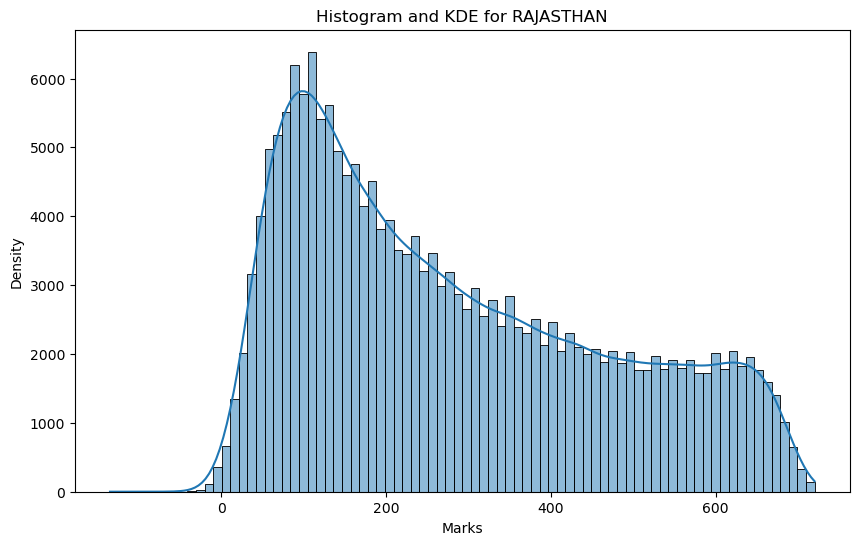

In [113]:
def plot_histogram_kde(state_name, df):
    state_data = df[df["state"] == state_name]
    
    if state_data.empty:
        print(f"No data available for the city: {state_name}")
        return
    
    plt.figure(figsize=(10, 6))
    sns.histplot(state_data["marks"], kde=True)
    plt.title(f"Histogram and KDE for {state_name}")
    plt.xlabel("Marks")
    plt.ylabel("Density")
    plt.show()

# Example usage
plot_histogram_kde("RAJASTHAN", DF_copy)


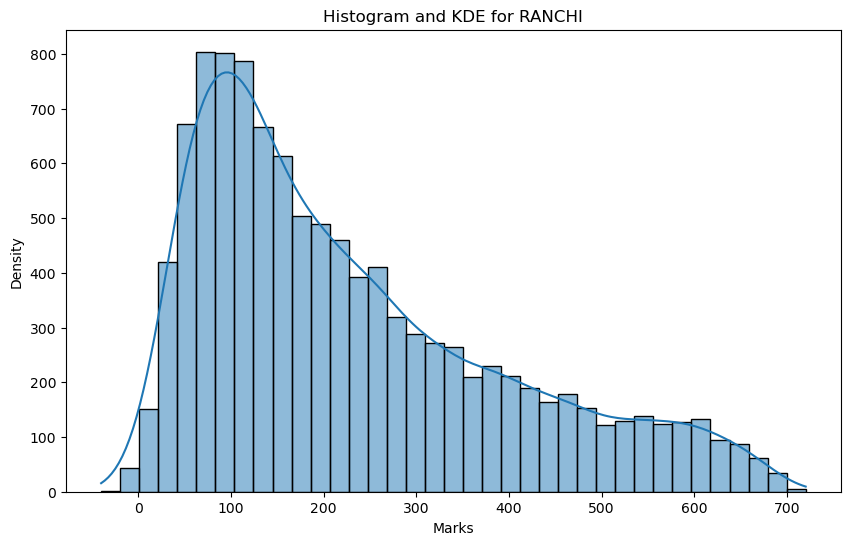

In [87]:
def plot_histogram_kde(city_name, df):
    city_data = df[df["city"] == city_name]
    
    if city_data.empty:
        print(f"No data available for the city: {city_name}")
        return
    
    plt.figure(figsize=(10, 6))
    sns.histplot(city_data["marks"], kde=True)
    plt.title(f"Histogram and KDE for {city_name}")
    plt.xlabel("Marks")
    plt.ylabel("Density")
    plt.show()

# Example usage
plot_histogram_kde("RANCHI", DF_copy)


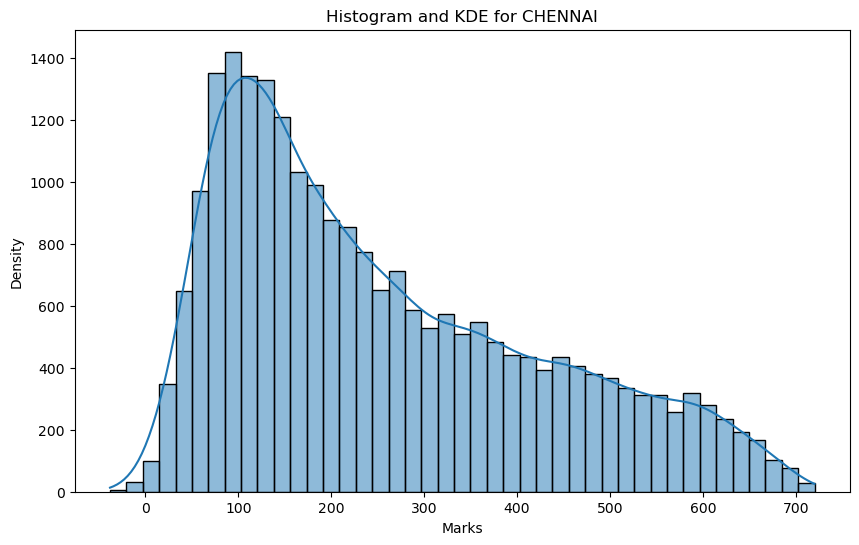

In [85]:
plot_histogram_kde("CHENNAI", DF_copy)

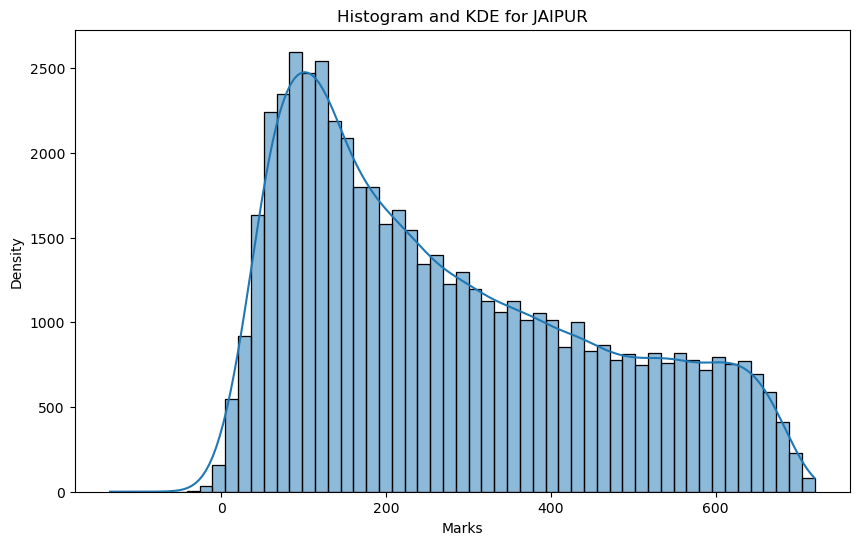

In [86]:
plot_histogram_kde("JAIPUR", DF_copy)

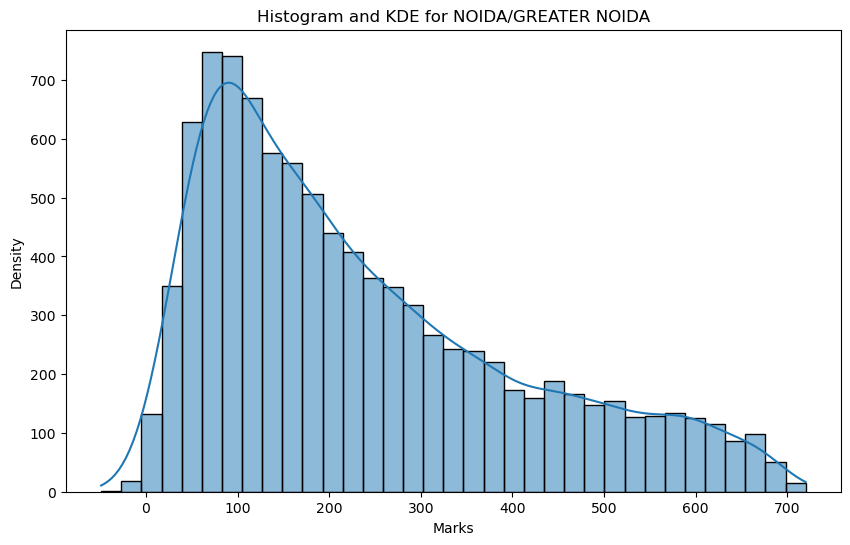

In [88]:
plot_histogram_kde("NOIDA/GREATER NOIDA", DF_copy)

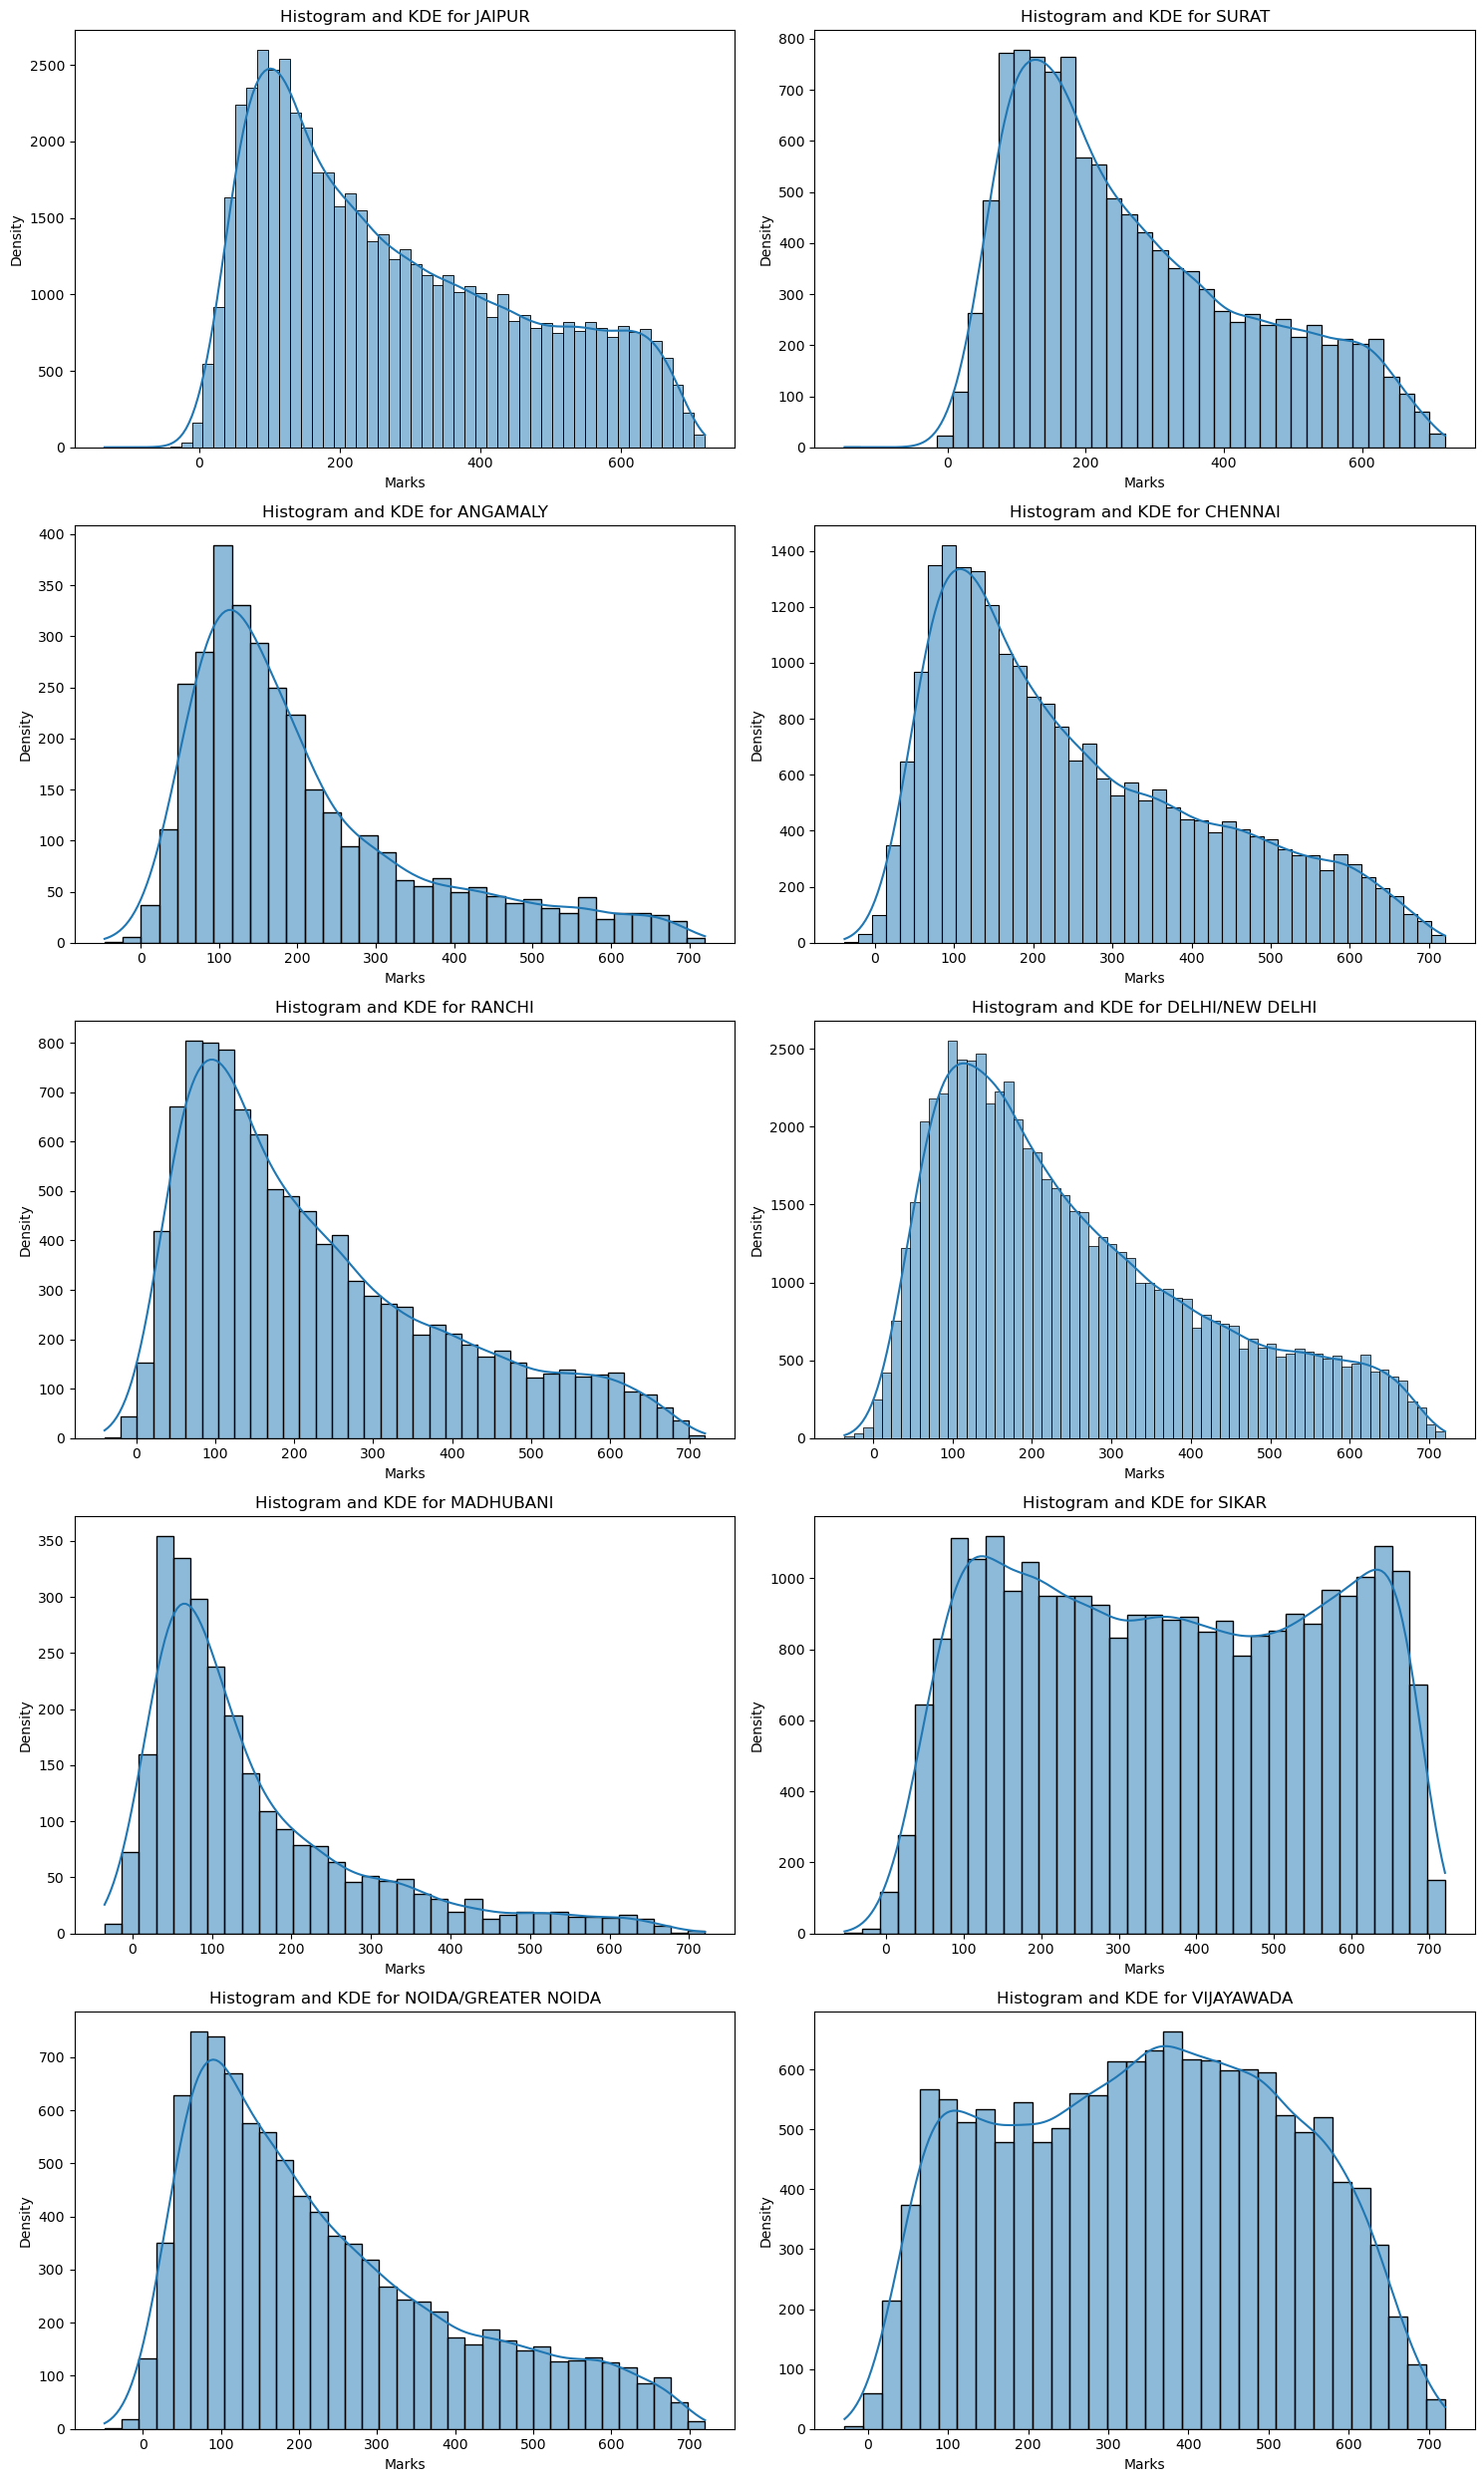

In [107]:
def plot_histogram_kde_multiple(cities, df):
    n = len(cities)
    
    if n > 10:
        print("Please enter up to 10 cities.")
        return
    
    cols = 2  # Two columns for subplots
    rows = (n + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    
    for i, city_name in enumerate(cities):
        city_data = df[df["city"] == city_name]
        
        if city_data.empty:
            print(f"No data available for the city: {city_name}")
            continue
        
        sns.histplot(city_data["marks"], kde=True, ax=axes[i])
        axes[i].set_title(f"Histogram and KDE for {city_name}")
        axes[i].set_xlabel("Marks")
        axes[i].set_ylabel("Density")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
cities_to_compare = ["JAIPUR", "SURAT", "ANGAMALY", "CHENNAI", "RANCHI", "DELHI/NEW DELHI", 
                     "MADHUBANI", "SIKAR", "NOIDA/GREATER NOIDA", "VIJAYAWADA"]
plot_histogram_kde_multiple(cities_to_compare, DF_copy)


City: JAIPUR
Mean: 276.60
Median: 232.00
Kurtosis: -0.82
Skewness: 0.57
Standard Deviation: 185.65
----------------------------------------
City: SURAT
Mean: 270.77
Median: 226.00
Kurtosis: -0.59
Skewness: 0.67
Standard Deviation: 171.79
----------------------------------------
City: ANGAMALY
Mean: 211.88
Median: 162.00
Kurtosis: 0.94
Skewness: 1.27
Standard Deviation: 153.89
----------------------------------------
City: CHENNAI
Mean: 255.26
Median: 209.00
Kurtosis: -0.50
Skewness: 0.72
Standard Deviation: 170.39
----------------------------------------
City: RANCHI
Mean: 229.33
Median: 182.00
Kurtosis: -0.09
Skewness: 0.90
Standard Deviation: 165.69
----------------------------------------
City: DELHI/NEW DELHI
Mean: 256.14
Median: 213.00
Kurtosis: -0.33
Skewness: 0.77
Standard Deviation: 168.66
----------------------------------------
City: MADHUBANI
Mean: 155.67
Median: 104.00
Kurtosis: 2.02
Skewness: 1.56
Standard Deviation: 143.37
----------------------------------------
City: SI

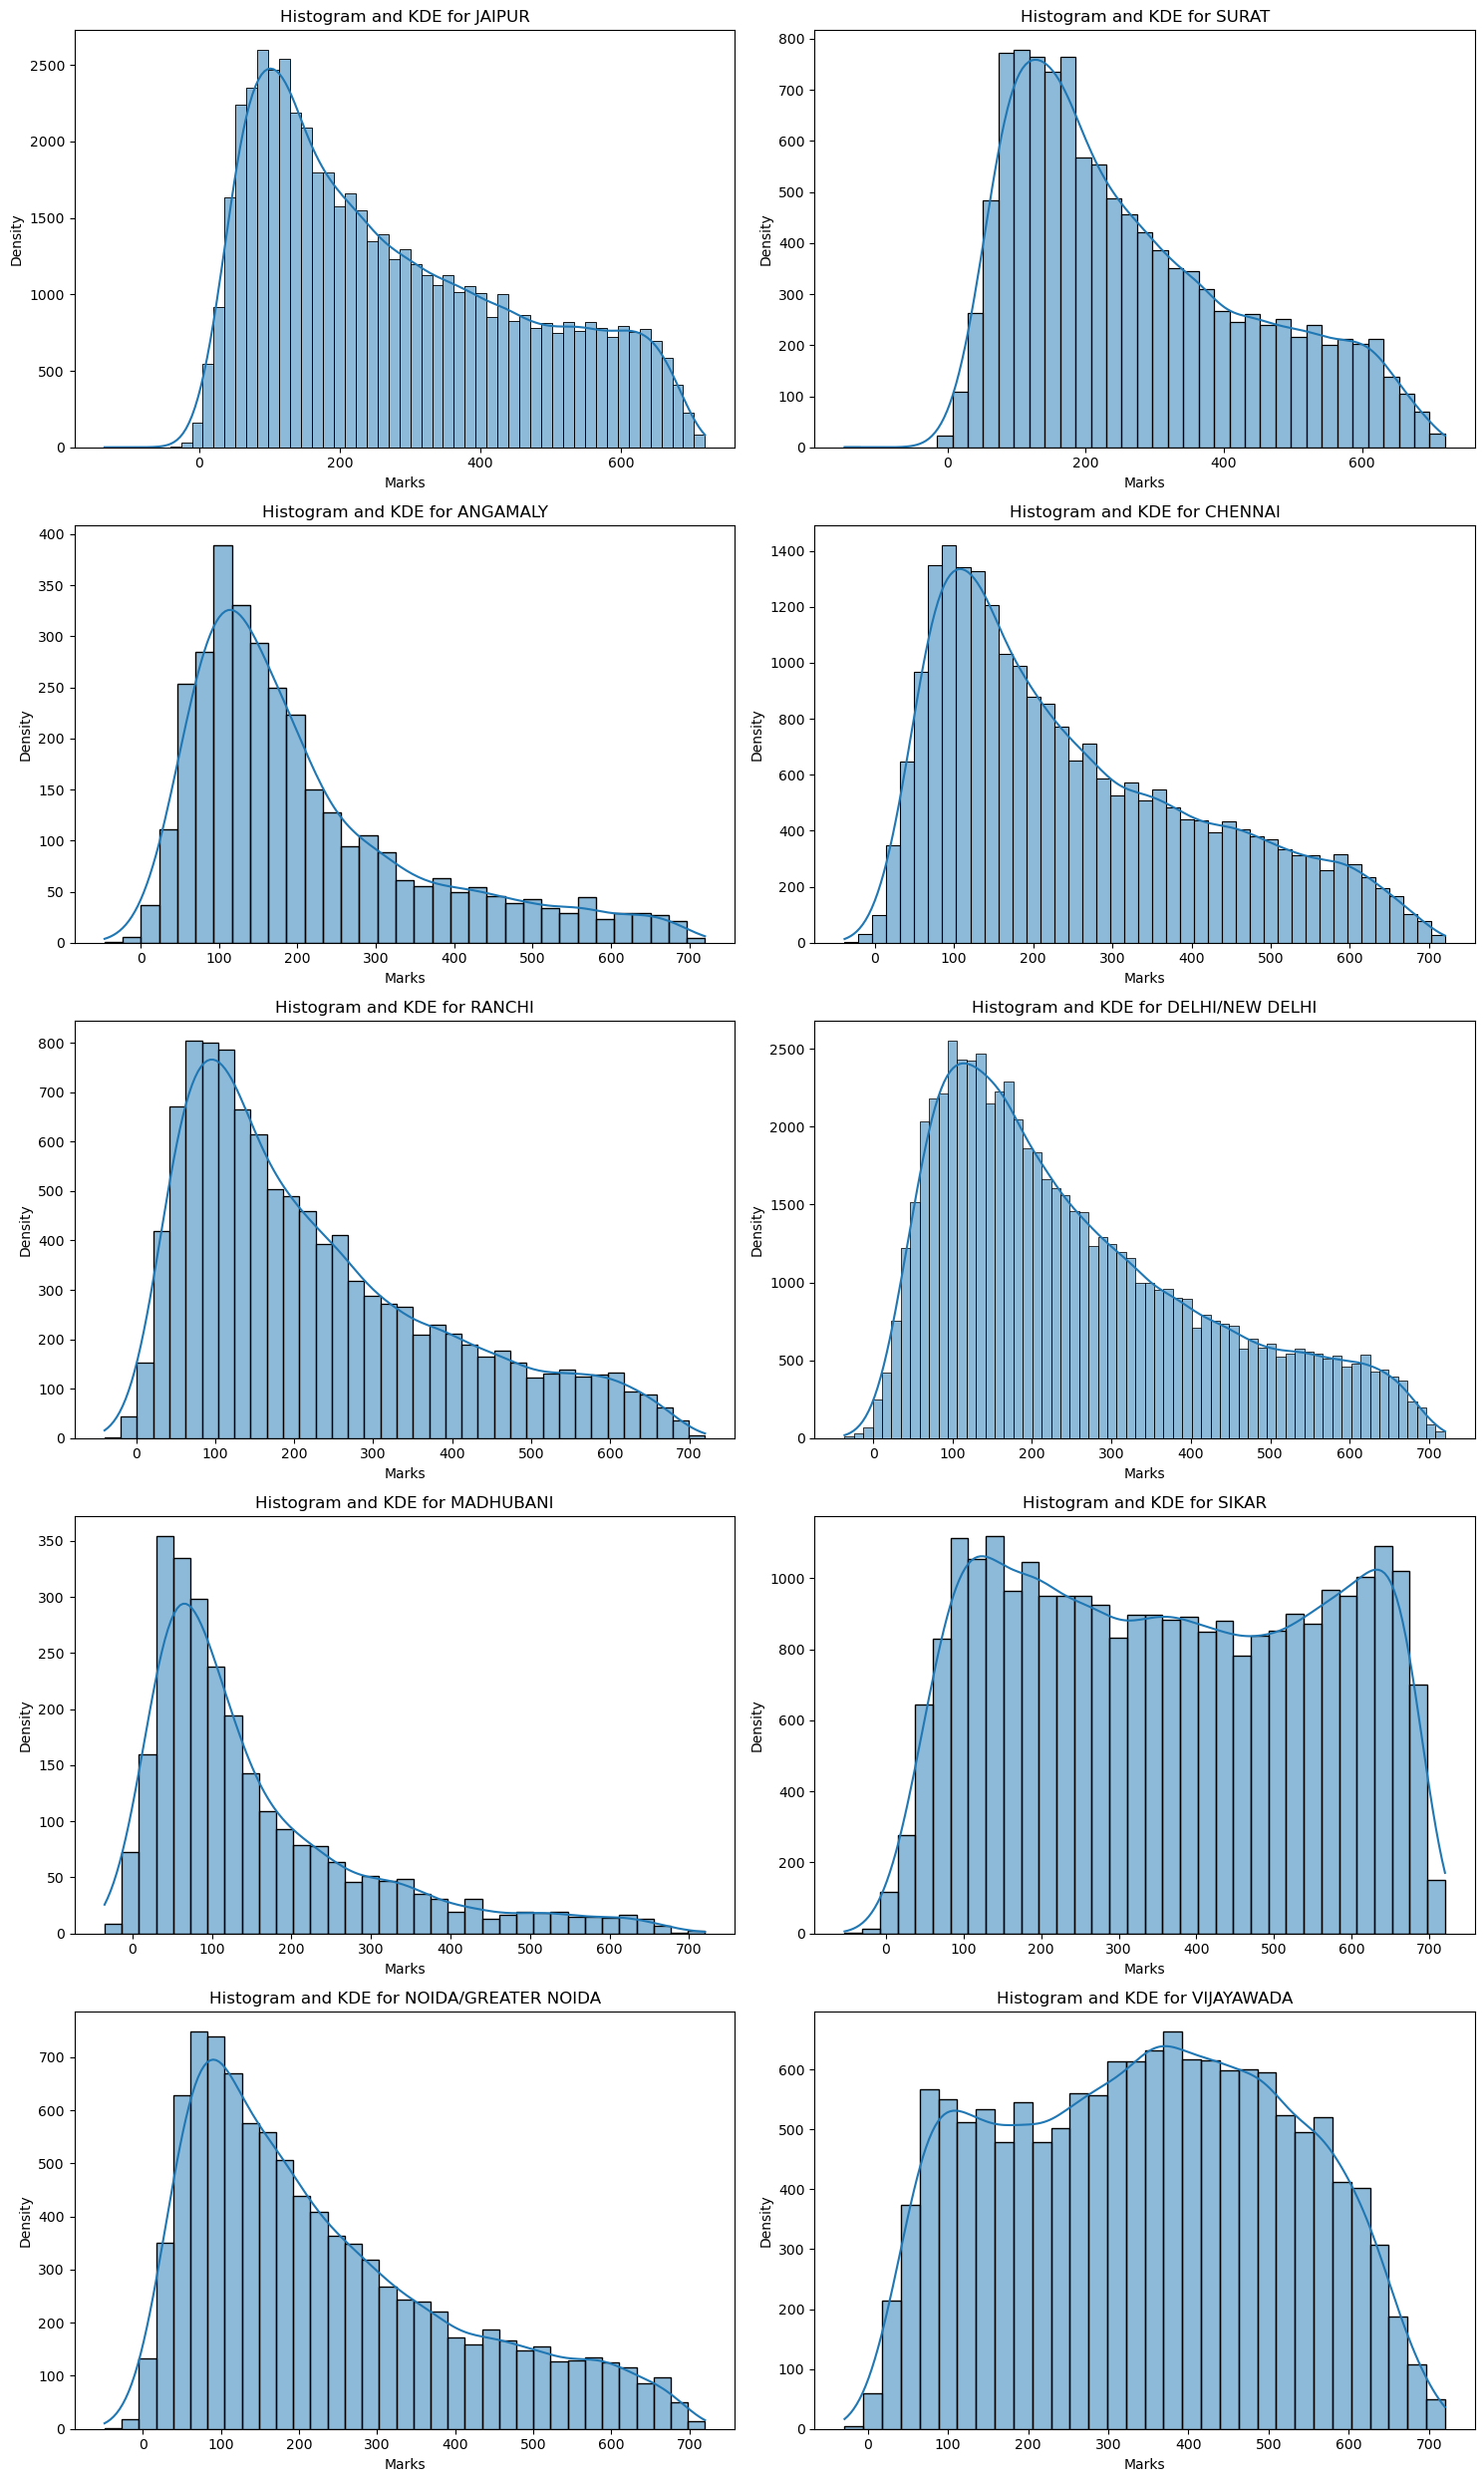

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import kurtosis, skew

def plot_histogram_kde_multiple(cities, df):
    n = len(cities)
    
    if n > 10:
        print("Please enter up to 10 cities.")
        return
    
    cols = 2  # Two columns for subplots
    rows = (n + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    
    for i, city_name in enumerate(cities):
        city_data = df[df["city"] == city_name]
        
        if city_data.empty:
            print(f"No data available for the city: {city_name}")
            continue
        
        # Calculate statistics
        marks = city_data["marks"]
        mean_val = marks.mean()
        median_val = marks.median()
        kurt_val = kurtosis(marks, nan_policy='omit')
        skew_val = skew(marks, nan_policy='omit')
        std_dev = marks.std()
        
        # Print statistics
        print(f"City: {city_name}")
        print(f"Mean: {mean_val:.2f}")
        print(f"Median: {median_val:.2f}")
        print(f"Kurtosis: {kurt_val:.2f}")
        print(f"Skewness: {skew_val:.2f}")
        print(f"Standard Deviation: {std_dev:.2f}")
        print("-" * 40)
        
        # Plot histogram and KDE
        sns.histplot(marks, kde=True, ax=axes[i])
        axes[i].set_title(f"Histogram and KDE for {city_name}")
        axes[i].set_xlabel("Marks")
        axes[i].set_ylabel("Density")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
cities_to_compare = ["JAIPUR", "SURAT", "ANGAMALY", "CHENNAI", "RANCHI", "DELHI/NEW DELHI", 
                     "MADHUBANI", "SIKAR", "NOIDA/GREATER NOIDA", "VIJAYAWADA"]
plot_histogram_kde_multiple(cities_to_compare, DF_copy)


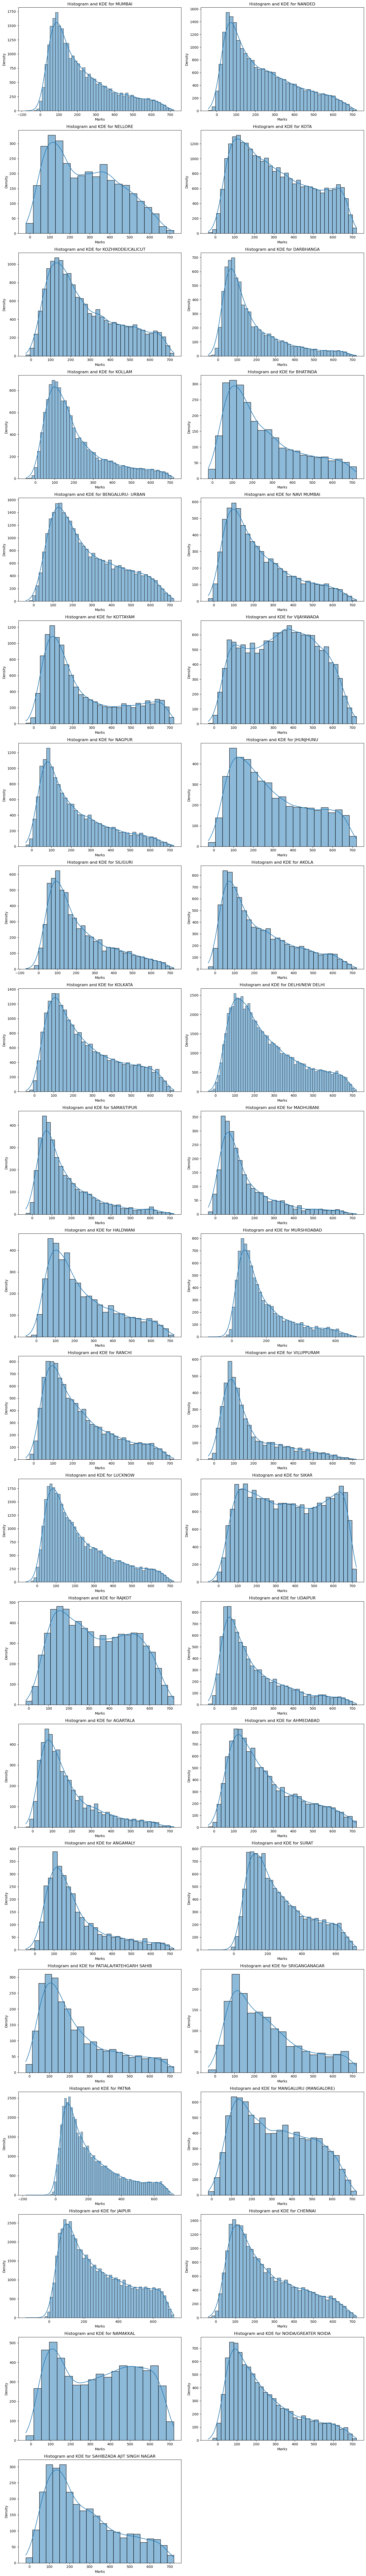

In [105]:
def plot_histogram_kde_multiple(cities, df):
    n = len(cities)
    
    if n > 50:
        print("Please enter up to 50 cities.")
        return
    
    cols = 2  # Two columns for subplots
    rows = (n + 1) // cols
    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    
    for i, city_name in enumerate(cities):
        city_data = df[df["city"] == city_name]
        
        if city_data.empty:
            print(f"No data available for the city: {city_name}")
            continue
        
        sns.histplot(city_data["marks"], kde=True, ax=axes[i])
        axes[i].set_title(f"Histogram and KDE for {city_name}")
        axes[i].set_xlabel("Marks")
        axes[i].set_ylabel("Density")
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Example usage
cities_to_compare = ['MUMBAI', 'NANDED', 'NELLORE', 'KOTA', 'KOZHIKODE/CALICUT', 
                     'DARBHANGA', 'KOLLAM', 'BHATINDA', 'BENGALURU- URBAN', 'NAVI MUMBAI', 
                     'KOTTAYAM', 'VIJAYAWADA', 'NAGPUR', 'JHUNJHUNU', 'SILIGURI', 'AKOLA', 
                     'KOLKATA', 'DELHI/NEW DELHI', 'SAMASTIPUR', 'MADHUBANI', 'HALDWANI', 
                     'MURSHIDABAD', 'RANCHI', 'VILUPPURAM', 'LUCKNOW', 'SIKAR', 'RAJKOT', 
                     'UDAIPUR', 'AGARTALA', 'AHMEDABAD', 'ANGAMALY', 'SURAT', 
                     'PATIALA/FATEHGARH SAHIB', 'SRIGANGANAGAR', 'PATNA', 'MANGALURU (MANGALORE)',
                     'JAIPUR', 'CHENNAI', 'NAMAKKAL', 'NOIDA/GREATER NOIDA', 
                     'SAHIBZADA AJIT SINGH NAGAR']
plot_histogram_kde_multiple(cities_to_compare, DF_copy)


**Describe the Distribution**: For each histogram-KDE plot, analyze the shape of the distribution (e.g., normal, skewed, bimodal).

**Key Statistical Insights**:
   - **Central Tendency**: Look for the peak of the KDE which indicates the mode. 
   - **Spread**: Look at the width of the histogram and KDE.
   - **Skewness**: Identify if the data is skewed to the left (negative skew) or right (positive skew).
   - **Kurtosis**: Identify the "tailedness" of the distribution.
   - **Outliers**: Identify any unusual observations far from the majority of the data.

**Compare Distributions**: If the histograms represent similar features from different datasets or different features from the same dataset, compare their shapes and spread to draw conclusions.

## Observations

1. **Shape of Distributions**:
    - Many histograms appear right-skewed, suggesting a concentration of data points towards lower values with a tail extending towards higher values.
    - Some histograms show a near-normal distribution, indicating data is symmetrically distributed around the mean.
    - A few histograms have multiple peaks (bimodal), indicating the presence of subgroups within the data.

2. **Central Tendency and Spread**:
    - The central tendency (mean/median/mode) varies significantly across the plots.
    - The spread of data (range, interquartile range) also varies, with some datasets showing a wide range and others more concentrated.

3. **Skewness**:
    - Positive skewness is observed in several plots, indicating a larger number of lower values with fewer high values.
    - Few plots exhibit negative skewness.

4. **Kurtosis**:
    - Some distributions appear to have high kurtosis with sharp peaks, while others are flatter, indicating lighter tails.

5. **Outliers**:
    - Outliers can be visually identified as bars that are distant from the main bulk of the data. However, specific outlier values cannot be determined without numerical analysis.

### Key Insights

- **Data Diversity**: The variety in distribution shapes indicates the data encompasses different characteristics and possibly different types of underlying phenomena.
- **Feature Engineering**: Depending on the context, features that are highly skewed might benefit from transformations (e.g., log-transform) to normalize them for certain machine learning algorithms.
- **Model Selection**: The presence of bimodal distributions or heavy skewness suggests that different models (e.g., mixture models, decision trees) might be more appropriate.
- **Normalization**: For algorithms sensitive to the scale of the data, normalization might be necessary due to the varying spreads.

For a more precise analysis, examining the raw data and calculating statistical summaries (mean, median, standard deviation, skewness, kurtosis) for each feature would be essential. If you can provide the underlying data or additional context, a more detailed statistical analysis can be conducted.

In [37]:
DF_copy.state.sample(20000).head()

# Randomly select samples from column "state" of DataFrame 

772373          KERALA
855391          KERALA
1737259     TAMIL NADU
492468         HARYANA
1064074    MAHARASHTRA
Name: state, dtype: object

In [34]:
DF_copy.sample(200000).head()

# Randomly select samples from DataFrame 

,marks,state,city,center_name,center_number
237557,285,BIHAR,MADHEPURA,HOLY CROSS SCHOOL,152504
1544788,429,RAJASTHAN,JAIPUR,MAHESHWARI PUBLIC SCHOOL,390332
1156371,218,MAHARASHTRA,PARBHANI,JAWAHAR NAVODAYA VIDYALAYA PARBHANI,313006
392152,30,GUJARAT,MODASA,SHRI J B SHAH ENGLISH MEDIUM SCHOOL,222403
1768705,262,TAMIL NADU,DHARMAPURI,KENDRIYA VIDYALAYA,412007


In [38]:
state.marks.describe()
# State-wise analysis of "marks", excluding "center_number" due to its unique 
## and non-informative values.

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
ANDAMAN AND NICOBAR ISLANDS (UT),1025.0,192.737561,126.354313,-5.0,103.0,155.0,263.00,680.0
ANDHRA PRADESH,63842.0,260.972385,174.312416,-89.0,110.0,224.0,393.00,720.0
ARUNACHAL PRADESH,4774.0,162.896942,116.649557,-16.0,79.0,129.0,218.00,705.0
ASSAM,44272.0,190.940459,154.371341,-102.0,76.0,137.0,268.00,715.0
BIHAR,136191.0,188.583585,158.670862,-180.0,71.0,133.0,263.00,720.0
CHANDIGARH(UT),3530.0,304.816714,178.131070,0.0,155.0,270.0,437.00,715.0
CHHATTISGARH,44241.0,185.636084,145.139822,-44.0,75.0,137.0,265.00,711.0
DADRA AND NAGAR HAVELI (UT),1207.0,221.932063,150.286273,-10.0,105.0,183.0,312.50,692.0
DAMAN AND DIU (UT),769.0,180.239272,117.562217,-4.0,96.0,150.0,240.00,665.0


In [60]:
# Filter for students with perfect scores (720 Marks)
perfect_scores = DF_copy[DF_copy["marks"] == 720]

# Count the number of students with 720 marks for each state
statewise_perfect_score = perfect_scores.groupby("state").size().reset_index(name="Number of Perfect Scores")

# Calculate the total number of perfect scores
total_perfect_scores = statewise_perfect_score["Number of Perfect Scores"].sum()

# Print the result
statewise_perfect_score,statewise_perfect_score.count(), total_perfect_scores

(             state  Number of Perfect Scores
 0   ANDHRA PRADESH                         4
 1            BIHAR                         4
 2            DELHI                         1
 3          GUJARAT                         4
 4        JHARKHAND                         1
 5        KARNATAKA                         3
 6           KERALA                         4
 7      MAHARASHTRA                         7
 8           PUNJAB                         4
 9        RAJASTHAN                        13
 10      TAMIL NADU                         8
 11         TRIPURA                         1
 12   UTTAR PRADESH                         3
 13     UTTARAKHAND                         1
 14     WEST BENGAL                         3,
 state                       15
 Number of Perfect Scores    15
 dtype: int64,
 61)

In [57]:
len(DF_copy[DF_copy['marks'] == 720])

# Total number of perfect scores

61

In [105]:
# Create a deep copy of the DataFrame
DF_copy = df.copy(deep=True)

DF_copy.head()

,dummy_srlno,marks,state,city,center_name,center_number
0,1101010001,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,1101010002,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,1101010003,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,1101010004,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,1101010005,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


In [106]:
DF_copy.drop(columns=["dummy_srlno"],inplace=True)

# Comment
## We are dropping the 'dummy_srlno' from the dataset because it contains approximately
### 2.3 million different values. Due to its high uniqueness, this column is likely not 
#### significant for our analysis.
DF_copy.head()

,marks,state,city,center_name,center_number
0,46,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
1,226,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
2,449,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
3,424,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101
4,222,ANDAMAN AND NICOBAR ISLANDS (UT),PORT BLAIR,KENDRIYA VIDYALAYA NO. 1,110101


<font size = 5.5> **City wise Analysis**

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [118]:
avg_all_INDIA = np.average(DF_copy['marks'])
var_all_INDIA = np.var(DF_copy['marks'])

top_2L = sorted(DF_copy['marks'], reverse=True)[0:200000]

avg_2L = np.average(top_2L)
var_2L = np.var(top_2L)

In [124]:
def AnalyzeCITY(city):
    city_df = DF_copy[DF_copy['city'] == city]
    
    # Average
    avg = np.average(city_df['marks'])
    var = np.var(city_df['marks'])
    print('Average Marks in CITY {} is {}'.format(city, round(avg, 2)))
    
    # Maximum
    maxi = max(city_df['marks'])
    print('Maximum Marks in CITY {} is {}'.format(city, maxi))
    
    # Minimum
    mini = min(city_df['marks'])
    print('Minimum Marks in CITY {} is {}'.format(city, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} City'.format(city))
    
    mu = avg_all_INDIA
    sigma = math.sqrt(var_all_INDIA)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of INDIA')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of students of city: {}'.format(city))
    plt.show()


Average Marks in CITY JAIPUR is 276.6
Maximum Marks in CITY JAIPUR is 720
Minimum Marks in CITY JAIPUR is -135


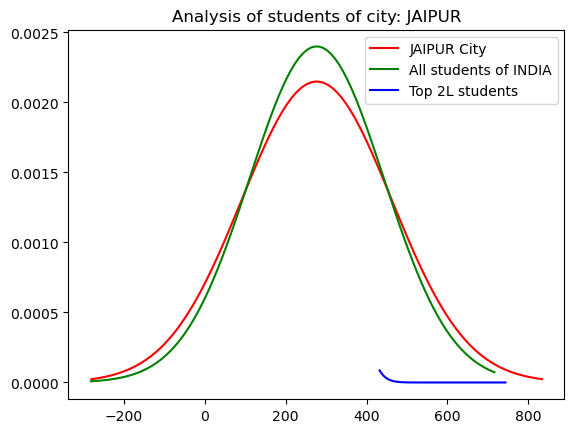

In [125]:
AnalyzeCITY("JAIPUR")

<font size = 5.5> **State wise Analysis**

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [129]:
avg_all_INDIA = np.average(DF_copy['marks'])
var_all_INDIA = np.var(DF_copy['marks'])

top_2L = sorted(DF_copy['marks'], reverse=True)[0:200000]

avg_2L = np.average(top_2L)
var_2L = np.var(top_2L)

In [75]:
def AnalyzeSTATE(state):
    state_df = DF_copy[DF_copy['state'] == state]
    
    # Average
    avg = np.average(state_df['marks'])
    var = np.var(state_df['marks'])
    print('Average Marks in State {} is {}'.format(state, round(avg, 2)))
    
    # Maximum
    maxi = max(state_df['marks'])
    print('Maximum Marks in State {} is {}'.format(state, maxi))
    
    # Minimum
    mini = min(state_df['marks'])
    print('Minimum Marks in State {} is {}'.format(state, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} State'.format(state))
    
    mu = avg_all_INDIA
    sigma = math.sqrt(var_all_INDIA)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of INDIA')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of students of state: {}'.format(state))
    plt.show()


Average Marks in State RAJASTHAN is 280.36
Maximum Marks in State RAJASTHAN is 720
Minimum Marks in State RAJASTHAN is -135


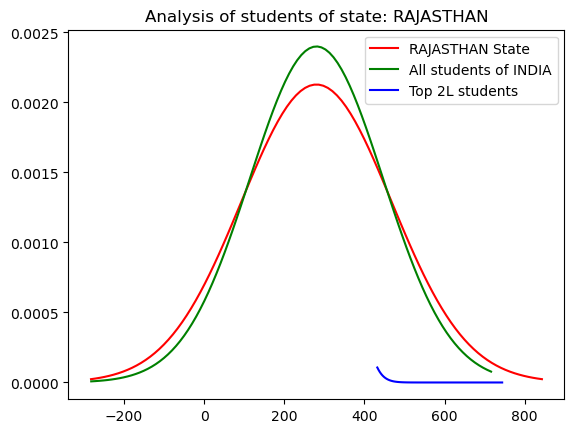

In [114]:
AnalyzeSTATE("RAJASTHAN")

Average Marks in State ANDHRA PRADESH is 260.97
Maximum Marks in State ANDHRA PRADESH is 720
Minimum Marks in State ANDHRA PRADESH is -89


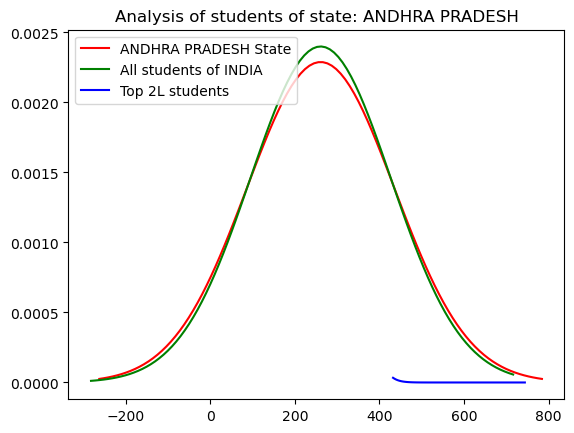

In [77]:
AnalyzeSTATE("ANDHRA PRADESH")

In [ ]:
sns.histplot(x = "marks", data= DF_copy[""], kde=True)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_histogram_kde(city_name, df):
    city_data = df[df["city"] == city_name]
    
    if city_data.empty:
        print(f"No data available for the city: {city_name}")
        return
    
    plt.figure(figsize=(10, 6))
    sns.histplot(city_data["marks"], kde=True)
    plt.title(f"Histogram and KDE for {city_name}")
    plt.xlabel("Marks")
    plt.ylabel("Density")
    plt.show()

# Example usage
plot_histogram_kde("", DF_copy)


<font size = 5.5> **Center Number wise Analysis**

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [130]:
avg_all_INDIA = np.average(DF_copy['marks'])
var_all_INDIA = np.var(DF_copy['marks'])

top_2L = sorted(DF_copy['marks'], reverse=True)[0:200000]

avg_2L = np.average(top_2L)
var_2L = np.var(top_2L)

In [133]:
def AnalyzeCenter(center_number):
    center_df = DF_copy[DF_copy['center_number'] == center_number]
    # Average
    avg = np.average(center_df['marks'])
    var = np.var(center_df['marks'])
    print('Average Marks in Center {} is {}'.format(center_number, round(avg, 2)))
    
    # Maximum
    maxi = max(center_df['marks'])
    print('Maximum Marks in Center {} is {}'.format(center_number, maxi))
    
    # Minimum
    mini = min(center_df['marks'])
    print('Minimum Marks in Center {} is {}'.format(center_number, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} center'.format(center_number))
    
    mu = avg_all
    sigma = math.sqrt(var_all)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of India')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of {} center number students'.format(center_number))
    plt.show()


Average Marks in Center 390332 is 289.09
Maximum Marks in Center 390332 is 701
Minimum Marks in Center 390332 is -2


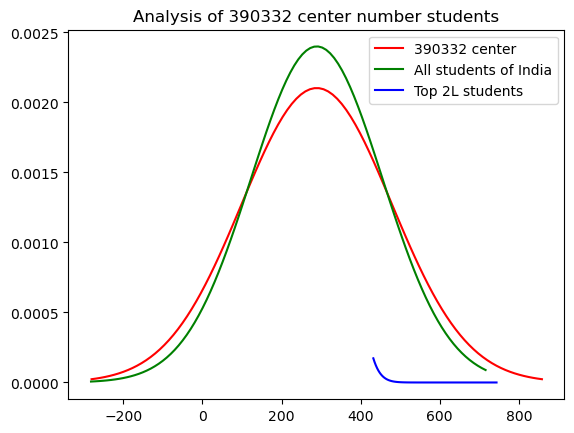

In [134]:
AnalyzeCenter(390332)

In [135]:
from sklearn.preprocessing import RobustScaler

# Assuming DF_copy is already defined
# DF_copy = ...

# Identify integer columns
int_columns = DF_copy.select_dtypes(include='int').columns

# Initialize RobustScaler
scaler = RobustScaler()

# Apply scaling only to integer columns
DF_copy[int_columns] = scaler.fit_transform(DF_copy[int_columns])

# Display the scaled DataFrame
print(DF_copy.head())


      marks                             state        city  \
0 -0.517699  ANDAMAN AND NICOBAR ISLANDS (UT)  PORT BLAIR   
1  0.278761  ANDAMAN AND NICOBAR ISLANDS (UT)  PORT BLAIR   
2  1.265487  ANDAMAN AND NICOBAR ISLANDS (UT)  PORT BLAIR   
3  1.154867  ANDAMAN AND NICOBAR ISLANDS (UT)  PORT BLAIR   
4  0.261062  ANDAMAN AND NICOBAR ISLANDS (UT)  PORT BLAIR   

                center_name  center_number  
0  KENDRIYA VIDYALAYA NO. 1      -1.322452  
1  KENDRIYA VIDYALAYA NO. 1      -1.322452  
2  KENDRIYA VIDYALAYA NO. 1      -1.322452  
3  KENDRIYA VIDYALAYA NO. 1      -1.322452  
4  KENDRIYA VIDYALAYA NO. 1      -1.322452  


<font size = 6> **USE THIS CODE WITH CAUTION!** 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import RobustScaler

# Function to perform Agglomerative Clustering and visualize dendrogram
def agglomerative_clustering(df, group_by=None):
    # Select relevant columns
    data = df[['marks', 'center_number']]

    # Apply robust scaling
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(data)

    # Visualize dendrogram
    plt.figure(figsize=(15, 7))
    dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
    plt.title('Dendrogram')
    plt.xlabel('Samples')
    plt.ylabel('Euclidean distances')
    plt.show()

    # Perform Agglomerative Clustering
    agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
    agg_clusters = agg_cluster.fit_predict(scaled_data)

    # Add the Agglomerative Clustering labels to the dataset
    df['Agg_Cluster'] = agg_clusters

    # Plot the clusters
    plt.figure(figsize=(10, 7))
    plt.scatter(df['marks'], df['center_number'], c=df['Agg_Cluster'], cmap='rainbow', marker='o')
    plt.title('Agglomerative Clustering')
    plt.xlabel('Marks')
    plt.ylabel('Center Number')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

    return df

# Load your DataFrame
# DF_copy = pd.read_csv('your_data.csv')  # Example of loading your DataFrame

# Use input method to determine how to perform clustering
group_by = input("Enter 'state', 'city', 'center_number' to cluster by specific part of the DataFrame, or press Enter to cluster entire DataFrame: ").strip()

if group_by in ['state', 'city', 'center_number']:
    unique_values = DF_copy[group_by].unique()
    clustered_data = pd.DataFrame()
    for value in unique_values:
        subset_df = DF_copy[DF_copy[group_by] == value]
        clustered_subset = agglomerative_clustering(subset_df)
        clustered_data = pd.concat([clustered_data, clustered_subset], axis=0)
else:
    clustered_data = agglomerative_clustering(DF_copy)

# Display the clustered DataFrame
print(clustered_data.head())


Enter 'state', 'city', 'center_number' to cluster by specific part of the DataFrame, or press Enter to cluster entire DataFrame: state


In [99]:
# Filter for students with perfect scores (720 Marks) and get the Center Number values
perfect_score_center_num = DF_copy[DF_copy["marks"] == 720]["center_number"].tolist()

# Print the list of cities
print(perfect_score_center_num)

[120304, 120501, 120503, 120504, 150402, 153105, 150245, 151807, 200192, 220106, 220106, 220701, 220804, 260313, 271215, 271216, 270715, 280602, 280708, 280202, 280826, 310214, 311250, 311407, 311120, 311007, 311011, 311102, 380204, 380504, 381404, 381406, 390301, 390302, 391804, 390513, 390527, 390601, 390319, 390325, 390327, 392344, 392346, 392349, 392502, 410801, 410806, 410808, 410107, 410114, 410114, 410117, 413104, 430101, 441012, 440801, 440801, 450201, 460806, 461502, 460902]


In [103]:
# Filter for students with perfect scores (720 Marks) and get the Center Number values as a set
perfect_score_center_num_set = set(DF_copy[DF_copy["marks"] == 720]["center_number"].unique())

# Print the set of cities
print(perfect_score_center_num_set,"\n")

print(len(perfect_score_center_num_set))

{200192, 150402, 410114, 220804, 280708, 410117, 460806, 280202, 153105, 430101, 392344, 450201, 280602, 392346, 220701, 390301, 390302, 392349, 390527, 380204, 390319, 413104, 410801, 441012, 120501, 390325, 120503, 120504, 390327, 392502, 410806, 410808, 311102, 461502, 310214, 390601, 220106, 311120, 311250, 380504, 260313, 381404, 381406, 311007, 440801, 311011, 150245, 460902, 271215, 120304, 271216, 311407, 390513, 410107, 280826, 270715, 391804, 151807} 

58


In [39]:
def save_subset_to_csv(large_df):
    # Check if the DataFrame is not empty
    if large_df.empty:
        print("The provided DataFrame is empty.")
        return
    
    # Get the subset name (assuming it's a value in a specific column, e.g., 'state')
    subset_name = input("Enter the name of the subset (e.g., state): ")
    
    # Get the column name used for subsetting
    column_name = input("Enter the column name for subsetting (e.g., state): ")
    
    # Ensure the column exists in the DataFrame
    if column_name not in large_df.columns:
        print(f"Column '{column_name}' not found in the DataFrame.")
        return
    
    # Get the name of the CSV file to save
    file_name = input("Enter the name of the CSV file (with .csv extension): ")
    
    # Filter the large DataFrame to create the subset
    subset = large_df[large_df[column_name] == subset_name]
    
    if not subset.empty:
        print(f"Subset for category '{subset_name}':")
        print(subset)
        
        # Save the subset to a CSV file
        subset.to_csv(f'C:\\Users\\user\\Desktop\\NEET DATA_ Analysis\\{file_name}', index=False)
        print(f"Subset saved to 'C:\\Users\\user\\Desktop\\NEET DATA_ Analysis\\{file_name}'")
    else:
        print(f"Subset '{subset_name}' not found in column '{column_name}'.")

# Example usage with the DataFrame DF_copy
# Assuming DF_copy is already defined and loaded

## DF_copy = pd.read_csv("C:\\Users\\user\\Desktop\\NEET DATA_ Analysis\\NEET_2024_RESULTS.csv")  
# Load the DataFrame

save_subset_to_csv(DF_copy)
# Call the function with the loaded DataFrame


Enter the name of the subset (e.g., state): ANDHRA PRADESH
Enter the column name for subsetting (e.g., state): state
Enter the name of the CSV file (with .csv extension): ANDHRA.csv
Subset for category 'ANDHRA PRADESH':
       marks           state    city                          center_name  \
1025     163  ANDHRA PRADESH  GUNTUR  LITTLE FLOWER ENGLISH MEDIUM SCHOOL   
1026     354  ANDHRA PRADESH  GUNTUR  LITTLE FLOWER ENGLISH MEDIUM SCHOOL   
1027     542  ANDHRA PRADESH  GUNTUR  LITTLE FLOWER ENGLISH MEDIUM SCHOOL   
1028     164  ANDHRA PRADESH  GUNTUR  LITTLE FLOWER ENGLISH MEDIUM SCHOOL   
1029     279  ANDHRA PRADESH  GUNTUR  LITTLE FLOWER ENGLISH MEDIUM SCHOOL   
...      ...             ...     ...                                  ...   
64862    554  ANDHRA PRADESH  ONGOLE         NEXTGEN INTERNATIONAL SCHOOL   
64863     87  ANDHRA PRADESH  ONGOLE         NEXTGEN INTERNATIONAL SCHOOL   
64864    553  ANDHRA PRADESH  ONGOLE         NEXTGEN INTERNATIONAL SCHOOL   
64865     

In [37]:
save_subset_to_csv(DF_copy)

## Wrong Input.

Enter the name of the subset (e.g., state): ANDAMAN
Enter the column name for subsetting (e.g., state): state
Enter the name of the CSV file (with .csv extension): ANDAMAN.csv
Subset 'ANDAMAN' not found in column 'state'.


<font size = 5.5> **ANDHRA PRADESH**

In [40]:
df_ANDHRA = pd.read_csv('C:\\Users\\user\\Desktop\\NEET DATA_ Analysis\\ANDHRA.csv')
df_ANDHRA.head()

,marks,state,city,center_name,center_number
0,163,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
1,354,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
2,542,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
3,164,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
4,279,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101


In [41]:
df_ANDHRA.shape

(63842, 5)

In [42]:
# General Information of the DataFrame/Data Sheet
df_ANDHRA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63842 entries, 0 to 63841
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   marks          63842 non-null  int64 
 1   state          63842 non-null  object
 2   city           63842 non-null  object
 3   center_name    63842 non-null  object
 4   center_number  63842 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [45]:
df_ANDHRA.describe()

,marks,center_number
count,63842.000000,63842.000000
mean,260.972385,121013.611134
std,174.312416,838.480146
min,-89.000000,120101.000000
25%,110.000000,120408.000000
50%,224.000000,120601.000000
75%,393.000000,121901.000000
max,720.000000,122905.000000


In [44]:
df_ANDHRA.marks.describe()

## Descriptive values of "marks", excluding center_number due to its unique 
### and non-informative values.

count    63842.000000
mean       260.972385
std        174.312416
min        -89.000000
25%        110.000000
50%        224.000000
75%        393.000000
max        720.000000
Name: marks, dtype: float64

In [46]:
# Create a deep copy of the DataFrame
df_ANDHRA_1 = df_ANDHRA.copy(deep=True)

df_ANDHRA_1.head()

,marks,state,city,center_name,center_number
0,163,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
1,354,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
2,542,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
3,164,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
4,279,ANDHRA PRADESH,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101


In [47]:
df_ANDHRA_1.center_number.unique().size

126

In [48]:
df_ANDHRA_1.center_name.unique().size

# Distinct values for both center_name and center_number necessitate their inclusion as 
## separate columns.

124

In [49]:
df_ANDHRA_1df_ANDHRA_1.drop(columns=["state"],inplace=True)

# Comment 1:
# The "state column can be dropped from the dataset as it contains only a single, 
## consistent value ("ANDRA PRADESH") and therefore provides no additional 
### information for analysis.
df_ANDHRA_1.head()

,marks,city,center_name,center_number
0,163,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
1,354,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
2,542,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
3,164,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101
4,279,GUNTUR,LITTLE FLOWER ENGLISH MEDIUM SCHOOL,120101


<Axes: xlabel='marks', ylabel='Count'>

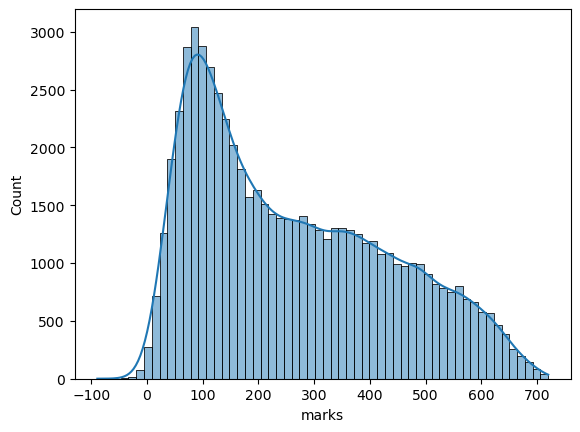

In [50]:
sns.histplot(x = "marks", data=df_ANDHRA_1, kde=True)

In [52]:
# City-wise analysis
city_performance = df_ANDHRA_1.groupby('city')['marks'].mean()
print("\nCity-wise performance:")
print(city_performance)


City-wise performance:
city
ANANTAPUR         197.060985
BHIMAVARAM        199.756728
CHIRALA           202.297830
CHITTOOR          174.487047
ELURU             170.915152
GOOTY             168.882759
GUDUR             176.198895
GUNTUR            268.143475
KADAPA            204.090533
KAKINADA          217.226159
KURNOOL           222.999587
MACHILIPATNAM     196.643192
MANGALAGIRI       220.770000
NANDYAL           196.613688
NARASARAOPET      186.493827
NELLORE           277.662621
ONGOLE            225.498440
PRODDATUR         212.758037
RAJAHMUNDRY       255.749571
SRIKAKULAM        229.901563
TADEPALLIGUDEM    190.387205
TANUKU            368.288977
TENALI            195.143251
TIRUPATHI         239.491681
VIJAYAWADA        343.563720
VISAKHAPATNAM     265.910190
VIZIANAGARAM      250.234700
Name: marks, dtype: float64


In [57]:
# Center-wise analysis
center_performance = df_ANDHRA_1.groupby('center_number')['marks'].mean()
print("Center-wise performance:")
center_performance

Center-wise performance:


center_number
120101    275.125535
120102    275.250853
120103    279.381526
120104    250.720408
120105    286.529158
             ...    
122901    252.015894
122902    262.102113
122903    251.482906
122904    261.390558
122905    207.259887
Name: marks, Length: 126, dtype: float64

Average Marks in Center 120101 is 275.13
Maximum Marks in Center 120101 is 700
Minimum Marks in Center 120101 is -3


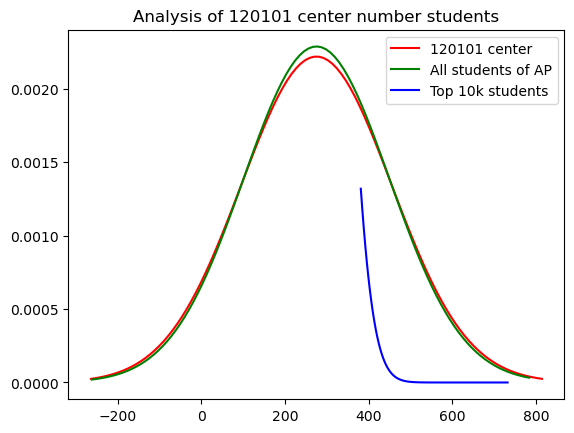

In [64]:
AnalyzeCenter(120101)

## Comparison of Distributions:

- **Red Curve (120101 center):** This represents the distribution of marks for students from the 120101 exam center.
- **Green Curve (All students of Andhra Pradesh):** This represents the distribution of marks for all students in AP.
- **Blue Curve (Top 10k students):** This represents the distribution of marks for the top 10,000 students.

### Overlap and Peak Analysis:

- The red and green curves are very similar and almost overlap entirely. This suggests that the performance of students from the 120101 center is quite representative of the overall performance of students in Andhra Pradesh.
- The blue curve (top 10k students) is shifted significantly to the right, indicating that the top 10,000 students have higher marks compared to the general population of students in Andhra Pradesh and those specifically from the 120101 center.

### Distribution Characteristics:

- The red and green curves are bell-shaped, indicating a normal distribution of marks for the 120101 center and all students of AP.

- The blue curve is not only shifted right but also appears narrower, **suggesting a smaller spread (variance) in marks among the top 10,000 students, implying more consistency in high marks among this group**.

### Performance Insights:

- The average performance of students in the 120101 center is very similar to the average performance of all students in Andhra Pradesh.
- The top 10,000 students perform significantly better

### 120101 center --  Represented by the red curve.
### All students of Andhra Pradesh -- Represented by the green curve.
### Top 10k students -- Represented by the blue curve.

# Key Insights:

### Distribution Shape:

- Both the red and green curves show a similar bell-shaped distribution, indicating a normal distribution of marks for both the 120101 center and all students of Andhra Pradesh.
- The blue curve has a different shape, indicating a different distribution for the top 10k students. This curve is more skewed to the right, showing that the top 10k students have higher marks overall.

### Peak and Spread:

- The red and green curves peak around the same point, suggesting that the average marks for the 120101 center and all students of AP are quite similar.
- The blue curve peaks much further to the right, indicating that the top 10k students have significantly higher average marks than the other two groups.
- The spread (width) of the red and green curves is similar, indicating comparable variance in marks for these groups. The blue curve is narrower, suggesting less variance in the top 10k students' marks.

### Comparison:

- The overlapping of the red and green curves suggests that the performance of students in the 120101 center is similar to the overall performance of students in Andhra Pradesh.
- The distinct separation of the blue curve from the red and green curves indicates that the top 10k students are a significantly different subset, with much higher marks.

## Conclusion:

- The students in the 120101 center have marks that are similar to the overall student population in Andhra Pradesh.
- The top 10k students stand out with much higher marks and a different distribution, indicating a distinct group of high achievers.

### Three Different Distributions:

- Red Curve: Represents the marks distribution for students at center number 120101.
- Green Curve: Represents the marks distribution for all students of Andhra Pradesh (AP).
- Blue Curve: Represents the marks distribution for the top 10,000 students.

### Comparison of Averages:

- All three distributions appear to have similar mean values, as indicated by the peaks of the red and green curves being closely aligned. This suggests that the average marks for students at center 120101 and all students in AP are similar.

### Variance and Spread:

- The red and green curves have a similar spread, indicating that the variance in marks for students at center 120101 and all students in AP are comparable.
- The blue curve has a noticeably different spread. It is much narrower and shifted to the right, indicating a higher average and lower variance for the top 10,000 students compared to the other groups.

### Performance of Top Students:

- The blue curve's peak is higher and located further to the right, suggesting that the top 10,000 students have significantly higher marks on average compared to the other groups. The lower variance implies that these top students' marks are more tightly clustered around the mean.

### Key Takeaways:

- **Similar Performance for Center 120101 and All AP Students:** The average performance and spread of marks for students at center 120101 are almost identical to the overall performance of students in AP. This could indicate that center 120101 is representative of the state's overall performance.

- **Exceptional Performance of Top Students:** The top 10,000 students outperform the general student population by a significant margin. This group not only has higher average marks but also less variation in their scores, indicating consistent high performance.

- **Visualization of Performance Disparities:** The plot effectively visualizes the disparities in performance among different groups of students, highlighting the difference between average students and top performers.

- These insights can be valuable for educators and policymakers to understand the performance distribution and identify areas that may need targeted interventions or support.

## Distributions Compared:

- Students from center number 120101 (red line).
- All students of AP (Andhra Pradesh) (green line).
- Top 10k students (blue line).

### Center Number 120101:

- The red line represents the distribution of marks for students from center number 120101.
- The peak and shape of the red line closely follow that of the green line, indicating that the performance of students from center 120101 is similar to the overall student performance in AP.

### All Students of AP:

- The green line represents the distribution of marks for all students from Andhra Pradesh.
- This line also shows a normal distribution curve with a peak slightly above 200 marks.

### Top 10k Students:

- The blue line represents the distribution of marks for the top 10,000 students.
- The peak of this distribution is much higher, around 400 marks, indicating that the top 10k students scored significantly higher than the general student population.
- The distribution for the top 10k students is also narrower, suggesting less variance in their marks compared to the general population.

### Performance Comparison:

- Both the center 120101 and all students of AP distributions have a similar peak and spread, suggesting that the center's performance is on par with the state average.
- The top 10k students' distribution being shifted to the right and narrower highlights the exceptional performance of these students compared to the broader groups.

### Overall Insights:
- The students from center 120101 perform similarly to the overall student population in Andhra Pradesh.
- There is a significant performance difference between the top 10k students and the rest of the students, indicating a high level of competition and excellence among the top performers.


In [ ]:
## sns.relplot(x = "marks", y = "center_number", data =df_ANDRA )

In [ ]:
## sns.catplot(x="marks", y="center_number", kind ="swarm", data = df_ANDRA)
## not suitable for large DataFrame

In [ ]:
## sns.catplot(x= "marks", y = "center_number", kind = "box", data = df_ANDRA)

## not suitable for large DataFrame

In [ ]:
# Visualization
city_performance.plot(kind='kde')
plt.ylabel('Average Marks')
plt.title('Average Marks by City')
plt.show()

In [ ]:
# Visualization
city_performance.plot(kind='bar')
plt.ylabel('Average Marks')
plt.title('Average Marks by City')
plt.show()

In [ ]:
(720*80)/100,(720*85)/100,(720*90)/100,(720*95)/100,(720*99)/100

In [ ]:
# Function to calculate percentage and number of students within specified ranges
def calculate_percentage_and_count(df_ANDRA):
    total_students = len(df_ANDRA)
    ranges = {
        "80% to 85%": (576, 612),
        '85% to 90%': (612, 648),
        '90% to 95%': (648, 684),
        '95% to 99%': (684, 712),
        '99% to 100%': (712, 720)
    }
    
    results = {}
    for range_label, (lower_bound, upper_bound) in ranges.items():
        count = df_ANDRA[(df_ANDRA['marks'] >= lower_bound) & (df_ANDRA['marks'] <= upper_bound)].shape[0]
        percentage = (count / total_students) * 100
        results[range_label] = {'count': count, 'percentage': percentage}
    
    return results

# Calculate the results
results = calculate_percentage_and_count(df_ANDRA)

# Print the results
print("\nPercentage and count of students in specified ranges:")
for range_label, stats in results.items():
    print(f"Range: {range_label}, Count: {stats['count']}, Percentage: {stats['percentage']:.2f}%")


In [ ]:
# List of center_number with perfect scores
perfect_score_centers = df_ANDRA[df_ANDRA['marks'] == 720]['center_number'].unique()
print("\nCenters with perfect scores:")
print(perfect_score_centers)

In [ ]:
# List of center_number with perfect scores
perfect_score_centers = df_ANDRA[df_ANDRA['marks'] == 720]['center_name'].unique()
print("\nCenters with perfect scores:")
print(perfect_score_centers)

In [ ]:
# List of center_number with perfect scores
perfect_score_centers = df_ANDRA[df_ANDRA['marks'] == 720]['center_number'].unique()
perfect_score_count = len(perfect_score_centers)

print("\nCenters with perfect scores:")
print(perfect_score_centers)
print(f"Number of centers with perfect scores: {perfect_score_count}")

In [ ]:
# List of center_number with perfect scores
perfect_score_centers = df_ANDRA[df_ANDRA['marks'] == 720]['center_number'].value_counts()
print("\nCenters with perfect scores and their counts:")
print(perfect_score_centers)

In [ ]:
# Specify the city of interest
particular_city = "TANUKU"  

# Extract data for the specified city
city_data = df_ANDRA[df_ANDRA['city'] == particular_city]

# Center-wise performance in the city
center_performance = city_data.groupby('center_number')['marks'].mean()
print("Center-wise performance in", particular_city)
print(center_performance)

# Plot histogram with KDE for the city
plt.figure(figsize=(14, 6))

# Plot histogram with KDE for the city
plt.subplot(1, 2, 1)
sns.histplot(city_data['marks'], kde=True, bins=10, color='blue')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title(f'Histogram with KDE for Marks in {particular_city}')

# Plot bar plot with KDE for each center
plt.subplot(1, 2, 2)
sns.barplot(x='center_number', y='marks', data=df_ANDRA, palette='tab10')
plt.xlabel('Center Number')
plt.ylabel('Average Marks')
plt.title('Average Marks by Center Number')

plt.tight_layout()
plt.show()

In [ ]:
# Assuming your DataFrame is named df
particular_city = "TANUKU"  # Replace 'YourCityName' with the actual city name

# Extract data for the specified city
city_data = df_ANDRA[df_ANDRA['city'] == particular_city]

print(city_data)

In [ ]:
# Assuming your DataFrame is named df
particular_city = "TANUKU"  # Replace 'YourCityName' with the actual city name

# Extract data for the specified city
city_data = df_ANDRA[df_ANDRA['city'] == particular_city]

# Further filter for marks equal to 720
perfect_scores_in_city = city_data[city_data['marks'] >530]

# Display the result
print(perfect_scores_in_city[['center_number', 'marks']])


In [ ]:
# Plot histogram with KDE
plt.figure(figsize=(10, 6))
sns.histplot(city_data['marks'], kde=True, bins=25, color='blue')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.title(f'Histogram with KDE for Marks in {particular_city}')
plt.show()

<font size = 5.5> **ANDAMAN AND NICOBAR ISLANDS (UT)**

In [ ]:
import seaborn as sns             # Visualization Library
import matplotlib.pyplot as plt   # Visualization Library

# Assuming df_copy is already defined as the DataFrame
for col in df_ANDRA.columns:
    if df_ANDRA[col].dtype == "int64":
        value_counts = df_ANDRA[col].value_counts()
        print(f"Value counts for the column '{col}' are: \n\n{value_counts}\n")
        
        # Create a figure with three subplots: one for displot, one for scatter plot, and one 
        ## for boxplot
        fig, ax = plt.subplots(3, 1, figsize=(5, 5), gridspec_kw={'height_ratios': [5, 5, 2]})
        
        # Plotting the histogram and KDE
        sns.histplot(df_ANDRA[col], kde=True, ax=ax[0])
        ax[0].set_title(f'Distribution of {col}')
        
        # Plotting the scatter plot
##        sns.scatterplot(x=df_ANDRA[col], y=df_ANDRA.index, ax=ax[1])
##        ax[1].set_title(f'Scatter Plot of {col}')
##        ax[1].set_xlabel(col)
##        ax[1].set_ylabel('Index')
        
        # Plotting the boxplot
        sns.boxplot(x=df_ANDRA[col], ax=ax[2])
        ax[2].set_title(f'Boxplot of {col}')
        ax[2].set_xlabel(col)
        
        # Display the plots
        plt.tight_layout()
        plt.show()


In [ ]:
# Comment
## The marks greater than 5 are of the regions of North and West where the paper leak 
### scam had happened in 2024

df_ANDRA.loc[df_ANDRA["marks"]>530]

In [ ]:
x2 = df_ANDRA.loc[df_ANDRA["marks"]>530].count()
x2

In [ ]:
p2 = df_ANDRA["marks"].count()
p2

In [ ]:
percentage_high_score_ANDRA = (x2/p2)*100
percentage_high_score_ANDRA

## Percentage of marks above 530 is 9.473387 % which is....

<font size = 5.5> Analyse data according to regions – East, West, North, South, Central, North-East, and Union Territories, OUTSIDE-INDIA.

In [30]:
for col in DF_copy.columns:
    if DF_copy[col].dtype == "int64":
        value_counts = DF_copy[col].value_counts()
        print(f"Value counts for the column '{col}' are: \n\n{value_counts}\n")

## Value counts for the column 'marks' and "center_number"

Value counts for the column 'marks' are: 

 75     16157
 70     16151
 80     15974
 65     15810
 85     15784
        ...  
-136        1
-87         1
-56         1
-63         1
-68         1
Name: marks, Length: 800, dtype: int64

Value counts for the column 'center_number' are: 

220701    1968
220501    1836
150201    1746
271201    1738
460308    1695
          ... 
991401      53
990801      21
990901      14
990501       9
990401       8
Name: center_number, Length: 4750, dtype: int64



In [31]:
for col in DF_copy.columns:
    if DF_copy[col].dtype == "object":
        value_counts = DF_copy[col].value_counts()
        print(f"Value counts for the column '{col}' are: \n\n{value_counts}\n")

## Value counts for the column "state", "city", "center_name" 

Value counts for the column 'state' are: 

UTTAR PRADESH                       332626
MAHARASHTRA                         275245
RAJASTHAN                           193129
TAMIL NADU                          153702
KARNATAKA                           150894
KERALA                              138545
BIHAR                               136191
MADHYA PRADESH                      130238
WEST BENGAL                         117320
GUJARAT                              86952
TELANGANA                            77892
DELHI                                66090
ODISHA                               64310
ANDHRA PRADESH                       63842
HARYANA                              54861
JAMMU AND KASHMIR                    47551
ASSAM                                44272
CHHATTISGARH                         44241
JHARKHAND                            34401
PUNJAB                               26573
UTTARAKHAND                          21989
HIMACHAL PRADESH                     19062
MANIPUR    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats

def AnalyzeSTATE(state):
    # Filter the DataFrame for the given state
    state_df = DF_copy[DF_copy['state'] == state]
    
    # Average
    avg = np.average(state_df['marks'])
    var = np.var(state_df['marks'])
    print('Average Marks in State {} is {}'.format(state, round(avg, 2)))
    
    # Maximum
    maxi = max(state_df['marks'])
    print('Maximum Marks in State {} is {}'.format(state, maxi))
    
    # Minimum
    mini = min(state_df['marks'])
    print('Minimum Marks in State {} is {}'.format(state, mini))
    
    mu = avg
    sigma = math.sqrt(var)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='red', label='{} state'.format(state))
    
    mu = avg_all_INDIA
    sigma = math.sqrt(var_all_INDIA)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='green', label='All students of India')
    
    mu = avg_2L
    sigma = math.sqrt(var_2L)
    x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 100)
    plt.plot(x, stats.norm.pdf(x, avg, sigma), color='blue', label='Top 2L students')
    
    plt.legend()
    plt.title('Analysis of {} students of state'.format(state))
    plt.show()


In [ ]:
# Filter for students with perfect scores (720 Marks)
perfect_scores = DF_copy[DF_copy["marks"] == 720]

# Count the number of students with 720 marks for each state
statewise_perfect_score = perfect_scores.groupby("state").size().reset_index(name="Number of Perfect Scores")

# Print the result
statewise_perfect_score,statewise_perfect_score.count()

#### MemoryError: Unable to allocate 19.8 TiB for an array with shape (2721723300640,) and data type float64

<font size = 6> **USE ALL THE CODES GIVEN BELOW WITH CAUTION!--- HIGH Memory required**

In [ ]:
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

# Step 1: Apply robust scaling to the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(DF_copy[['marks', 'center_number']])

# Step 2: Visualize the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(scaled_data, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Step 3: Perform Agglomerative Clustering on the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_copy['cluster'] = cluster.fit_predict(scaled_data)

# Step 4: Plot the resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(DF_copy['marks'], DF_copy['center_number'], c=DF_copy['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.show()

In [ ]:
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


# Step 1: Apply robust scaling to the data
scaler = RobustScaler()
scaled_data = scaler.fit_transform(DF_copy[['marks', 'center_number']])

## Large number of "Outliers in The DataFrame"


# Step 3: Visualize the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()



In [ ]:
# Sample a subset of the data, for example, 1% of the original data

DF_sampled = DF_copy.sample(frac=0.01, random_state=42)


In [ ]:
pip install dask

In [ ]:
import dask.dataframe as dd
from dask_ml.cluster import AgglomerativeClustering


# Read the data using Dask
DF_dask = dd.from_pandas(DF_copy, npartitions=10)

# Apply robust scaling (Note: Dask does not support all scikit-learn scalers directly)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
DF_scaled = DF_dask[['marks', 'center_number']].map_partitions(scaler.fit_transform)

# Perform Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_dask['cluster'] = cluster.fit_predict(DF_scaled.compute())

# Convert back to pandas DataFrame for plotting
DF_result = DF_dask.compute()

# Plot the resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(DF_result['marks'], DF_result['center_number'], c=DF_result['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.show()


In [ ]:
pip install dask-ml

In [ ]:
import dask.dataframe as dd
from dask_ml.preprocessing import RobustScaler
from dask_ml.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Read the data using Dask
DF_dask = dd.from_pandas(DF_copy, npartitions=10)

# Apply robust scaling
scaler = RobustScaler()
DF_scaled = scaler.fit_transform(DF_dask[['marks', 'center_number']])

# Perform Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_dask['cluster'] = cluster.fit_predict(DF_scaled)

# Compute the result back to a pandas DataFrame for plotting
DF_result = DF_dask.compute()

# Plot the resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(DF_result['marks'], DF_result['center_number'], c=DF_result['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.show()


In [ ]:
import dask.dataframe as dd
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
import pandas as pd

# Convert pandas DataFrame to Dask DataFrame
DF_dask = dd.from_pandas(DF_copy, npartitions=10)

# Apply robust scaling
scaler = RobustScaler()
DF_dask[['marks', 'center_number']] = DF_dask[['marks', 'center_number']].map_partitions(scaler.fit_transform)

# Compute the scaled DataFrame
DF_scaled = DF_dask.compute()

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Perform Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_copy['cluster'] = cluster.fit_predict(DF_scaled)

# Plot the resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(DF_copy['marks'], DF_copy['center_number'], c=DF_copy['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.show()


In [ ]:
import dask.dataframe as dd
import pandas as pd
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Convert pandas DataFrame to Dask DataFrame
DF_dask = dd.from_pandas(DF_copy, npartitions=10)

# Function to apply RobustScaler to each partition
def robust_scaler(partition):
    scaler = RobustScaler()
    return pd.DataFrame(scaler.fit_transform(partition), columns=partition.columns)

# Apply robust scaling to the Dask DataFrame
DF_scaled = DF_dask[['marks', 'center_number']].map_partitions(robust_scaler).compute()

# Visualize the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Perform Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_copy['cluster'] = cluster.fit_predict(DF_scaled)

# Plot the resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(DF_copy['marks'], DF_copy['center_number'], c=DF_copy['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.show()


In [ ]:
from sklearn.preprocessing import RobustScaler

# Select relevant features for clustering
features = DF_copy[['marks', 'center_number']]

# Standardize the features
scaler = RobustScaler() 

## Sclaing is done as clustering is distance based -- Read in DETAIL
scaled_features = scaler.fit_transform(features)



In [ ]:
from sklearn.cluster import AgglomerativeClustering

agg_cluster = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='complete')
agg_clusters = agg_cluster.fit_predict(scaled_features)

# Add the Agglomerative Clustering labels to the dataset
data['Agg_Cluster'] = agg_clusters

In [ ]:
# Visualize the Dendrogram to show the hierarchical clustering
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,7))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='complete'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Step 1: Apply robust scaling to the data
scaler = RobustScaler()

# Step 2: Extract a subset of the DataFrame for a particular state
state = input("Enter the state: ")
DF_state = DF_copy[DF_copy['state'] == state]

# Focus on the columns "marks" and "center_number"
DF_state_scaled = scaler.fit_transform(DF_state[['marks', 'center_number']])

# Step 3: Visualize the dendrogram
plt.figure(figsize=(10, 7))
plt.title("Dendrogram")
dendrogram = shc.dendrogram(shc.linkage(DF_state_scaled, method='ward'))
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()

# Step 4: Perform Agglomerative Clustering on the scaled data
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
DF_state['cluster'] = cluster.fit_predict(DF_state_scaled)

# Step 5: Plot the resulting clusters
plt.figure(figsize=(10, 7))
plt.scatter(DF_state['marks'], DF_state['center_number'], c=DF_state['cluster'], cmap='rainbow')
plt.title("Agglomerative Clustering")
plt.xlabel('Marks')
plt.ylabel('Center Number')
plt.show()


https://chatgpt.com/c/1420332f-32d2-4789-9cd4-87dbdaf849eb

https://chatgpt.com/c/a47f3876-336e-4e16-8b70-516a842bf61c
https://chatgpt.com/c/a47f3876-336e-4e16-8b70-516a842bf61c -- Sheena

https://chatgpt.com/c/b7dfd124-4003-4f14-8d87-7ecefee3031e
https://chatgpt.com/c/b7dfd124-4003-4f14-8d87-7ecefee3031e -- AJ

https://gemini.google.com/app/370f6368a45b1a78?hl=en-IN
https://gemini.google.com/app/85e4f8791b971799?hl=en-IN  -- AJ


https://chatgpt.com/c/f095864a-dd39-4fb6-9f0e-fe52c9ae4019